In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['figure.dpi'] = 200
sns.set_theme(style = 'darkgrid')
sns.color_palette("rocket")
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN, KMeans

* Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.


#  Data Description:

Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States

In [2]:
df = pd.read_csv('7.crime_data.csv')

In [3]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
df.rename(columns={'Unnamed: 0':'State'}, inplace = True)

In [5]:
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [8]:
df.isnull().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

<Axes: >

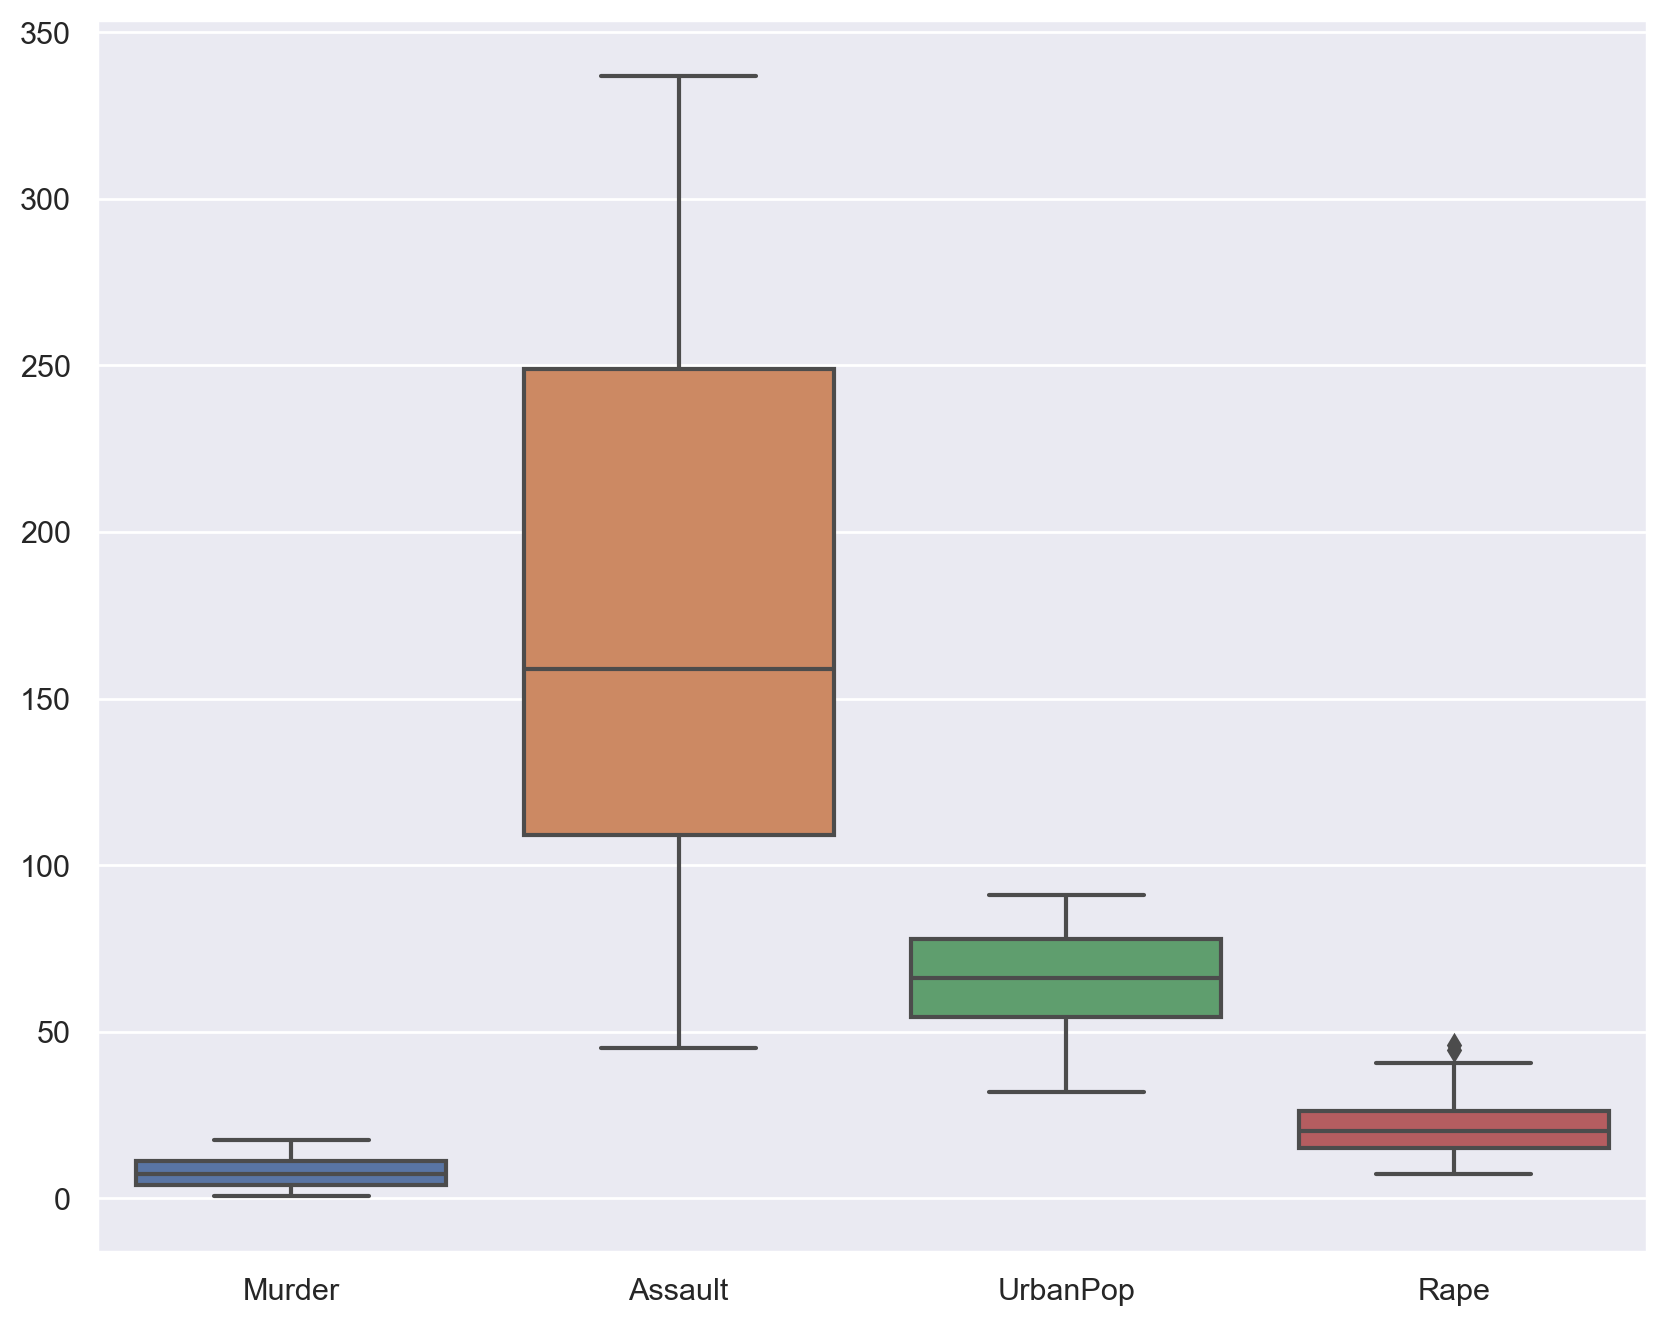

In [9]:
sns.boxplot(df)

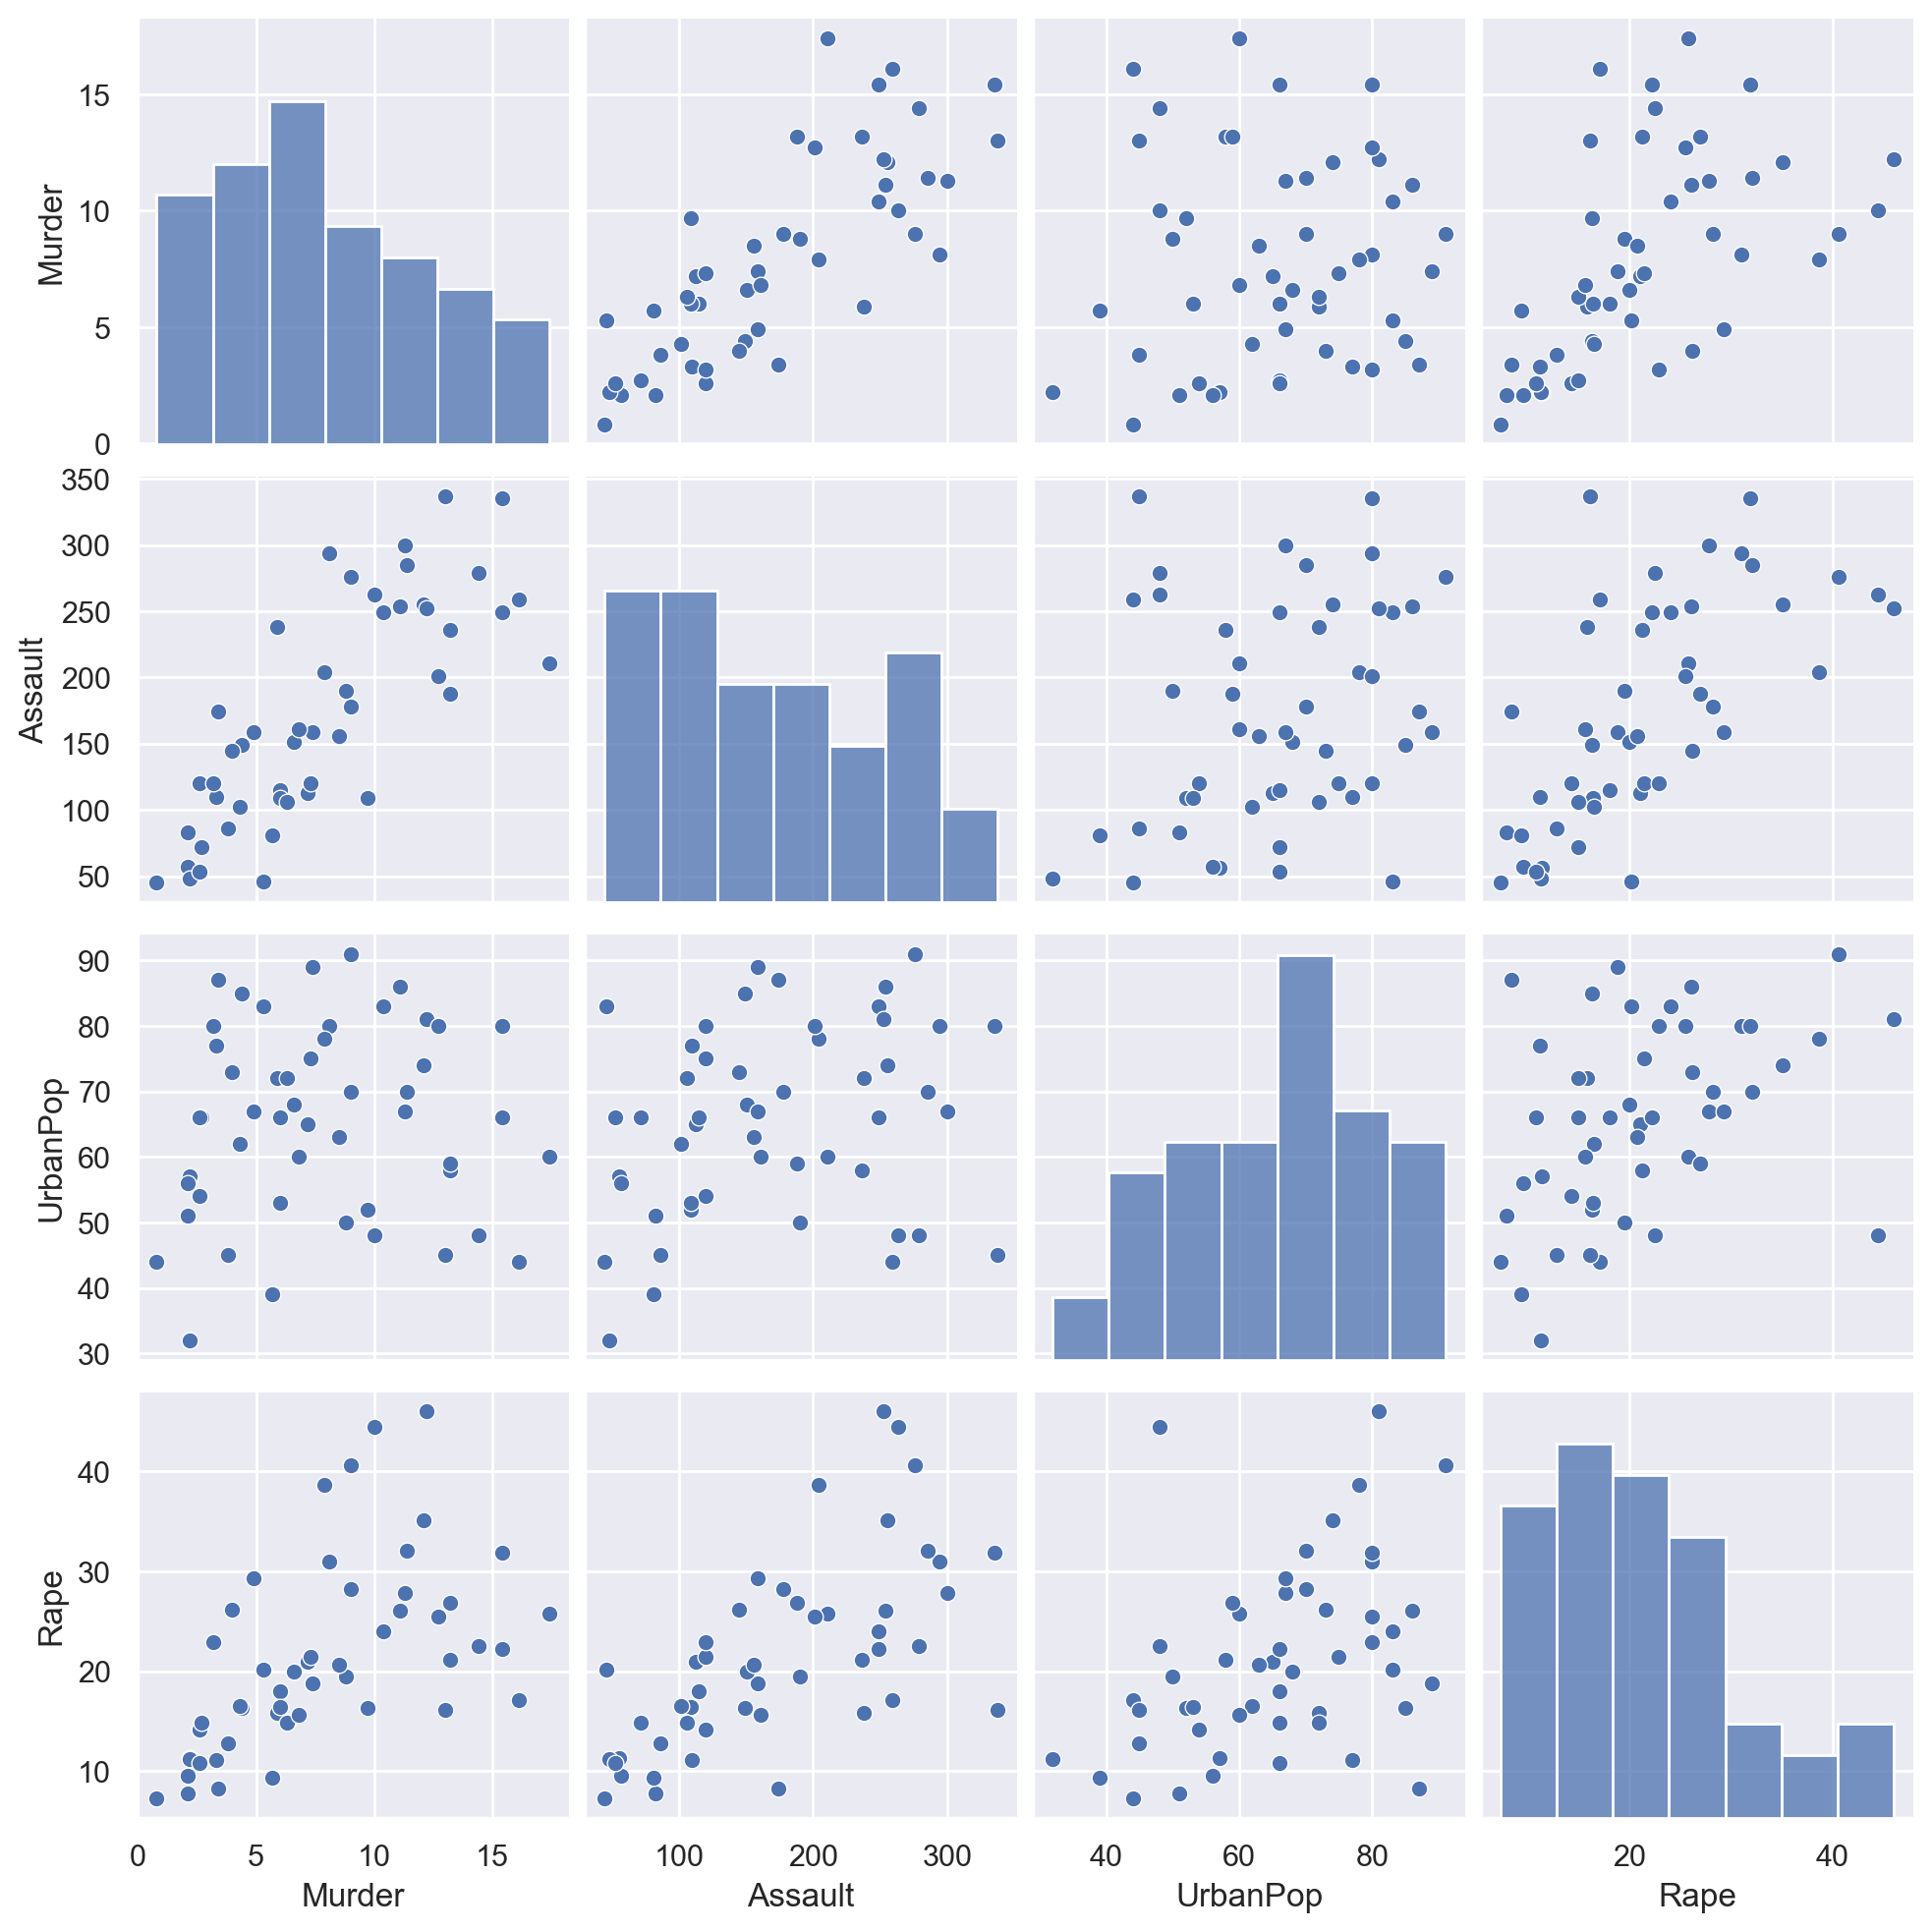

In [10]:
sns.pairplot(df)

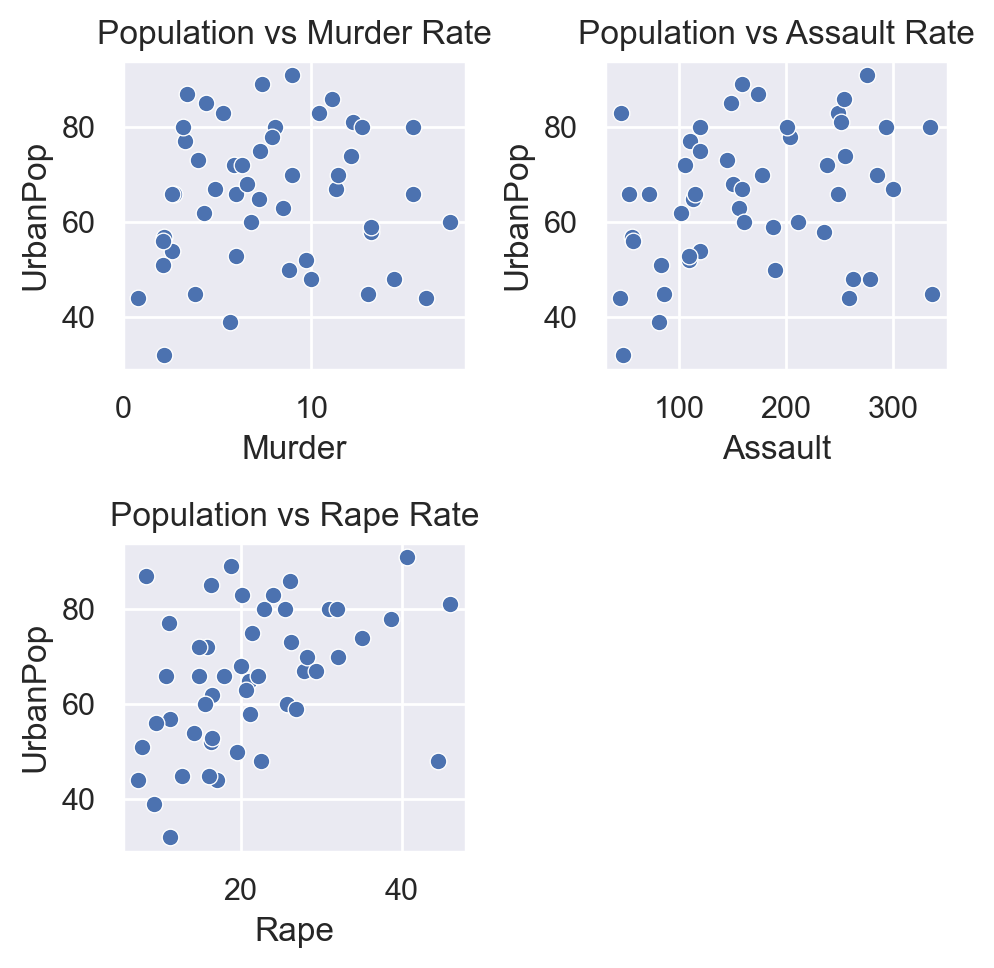

In [11]:
plt.figure(figsize=(5,5))
plt.subplot(2,2,1)
sns.scatterplot(data = df, y= 'UrbanPop', x = 'Murder')
plt.title('Population vs Murder Rate')
plt.subplot(2,2,2)
sns.scatterplot(data = df, y= 'UrbanPop', x = 'Assault')
plt.title('Population vs Assault Rate')
plt.subplot(2,2,3)
sns.scatterplot(data = df, y= 'UrbanPop', x = 'Rape')
plt.title('Population vs Rape Rate')
plt.tight_layout()

Text(0.5, 1.0, 'STATEWISE POPULATION')

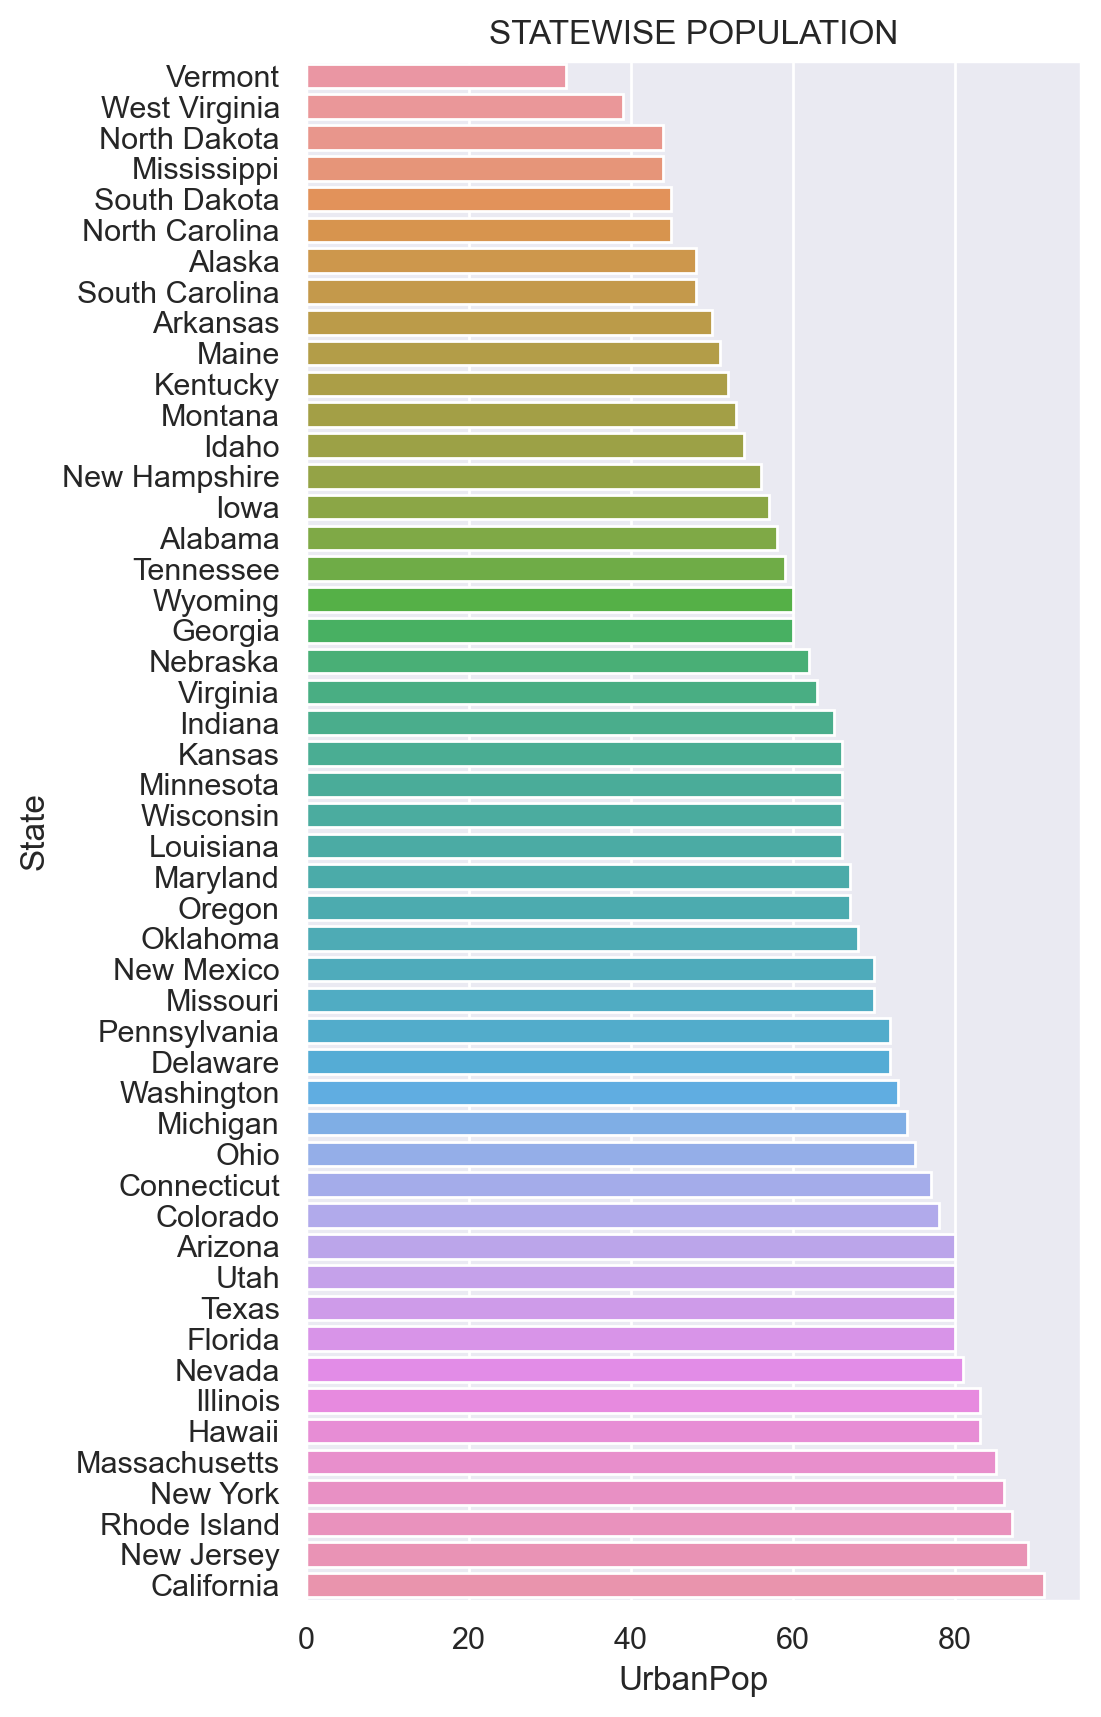

In [12]:
plt.figure(figsize=(5,10))
sns.barplot(data = df,x = 'UrbanPop', y = 'State', order=df.sort_values('UrbanPop').State)
plt.title('STATEWISE POPULATION')

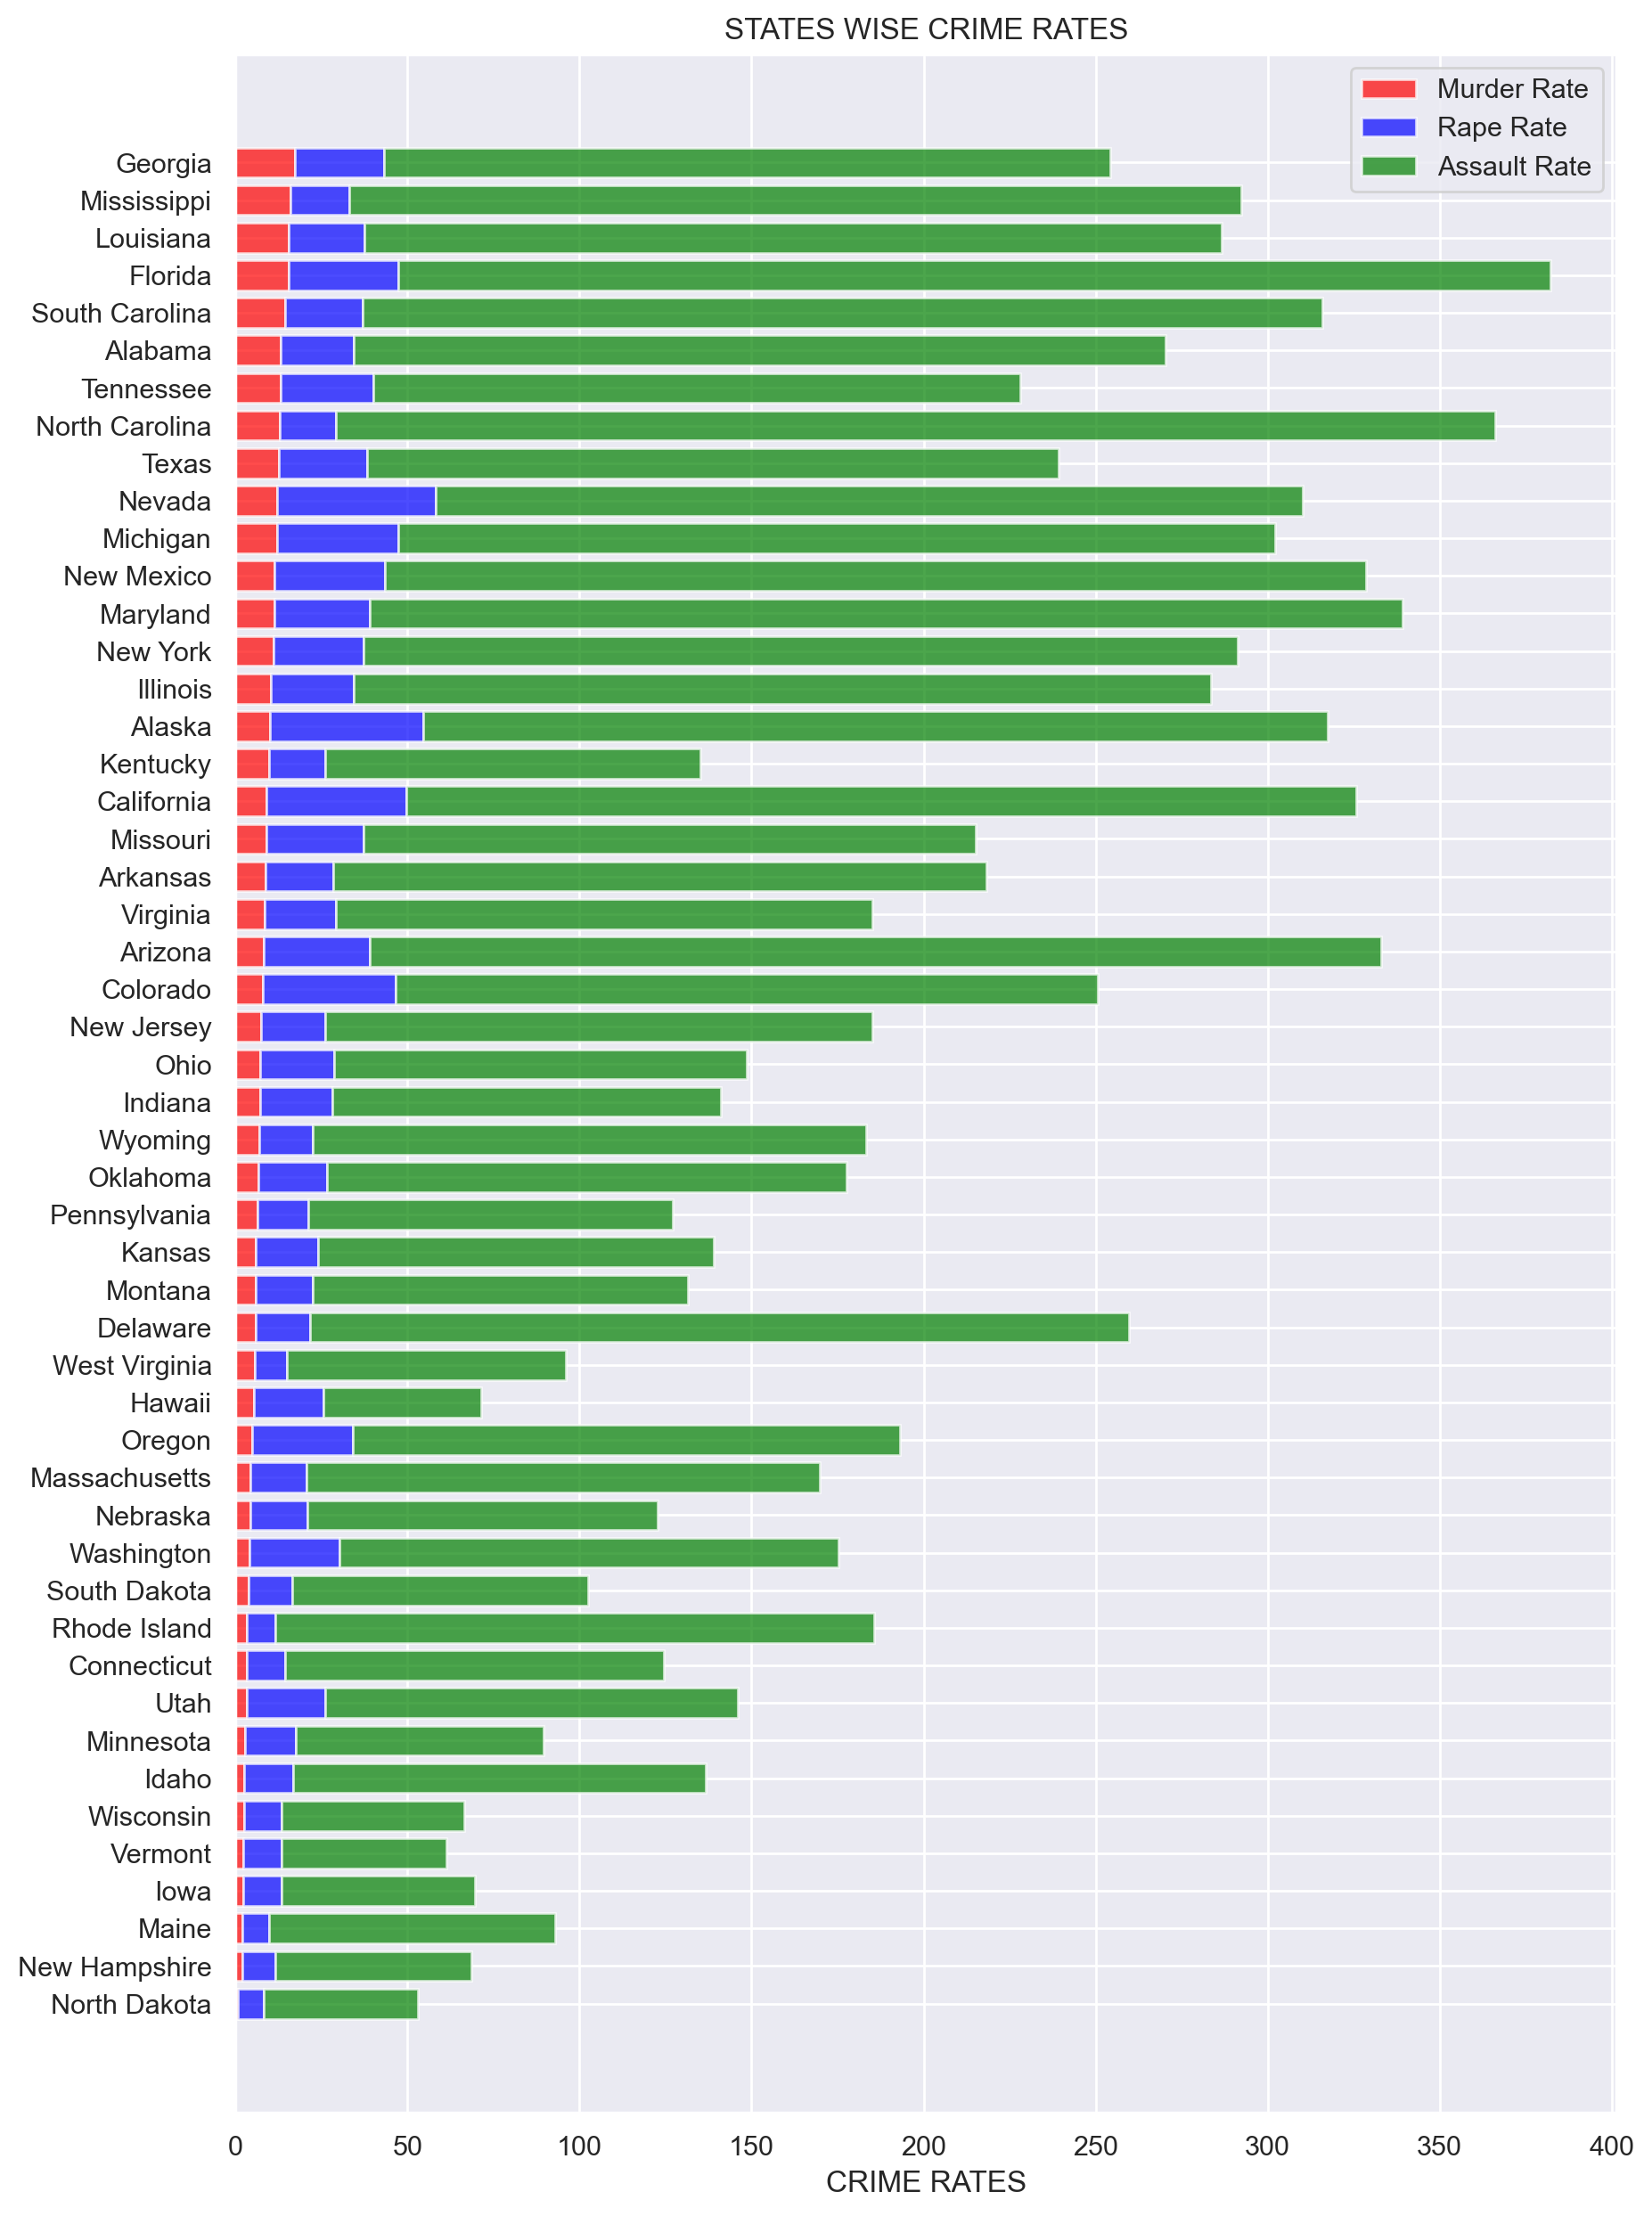

In [13]:
data_sorted = df.sort_values(by='Murder')

# Extract state names and rates
states = data_sorted['State']
murder_rates = data_sorted['Murder']
assault_rates = data_sorted['Assault']
rape_rates = data_sorted['Rape']


# creating figure and Axis for the graph
fig, ax = plt.subplots(figsize=(10,15))
#plot murder_rates
ax.barh(states, murder_rates, color='red',alpha=0.7, label='Murder Rate')
# plot rape_rates
ax.barh(states, rape_rates,left = murder_rates, color='blue', alpha=0.7, label='Rape Rate')
ax.barh(states, assault_rates, left=[a + b for a, b in zip(murder_rates, rape_rates)], color='green', alpha=0.7, label='Assault Rate')

# Add labels and legend
ax.set_xlabel('CRIME RATES')
ax.set_title('STATES WISE CRIME RATES')
ax.legend()

plt.show()

In [14]:
print('MAX ASSAULT RATE\n',df.iloc[df['Assault'].argmax()])
print('\nMIN ASSAULT RATE\n',df.iloc[df['Assault'].argmin()])

print('MAX MURDER RATE\n',df.iloc[df['Murder'].argmax()])
print('\nMIN MURDER RATE\n',df.iloc[df['Murder'].argmin()])

print('MAX RAPE RATE\n',df.iloc[df['Rape'].argmax()])
print('\nMIN RAPE RATE\n',df.iloc[df['Rape'].argmin()])

MAX ASSAULT RATE
 State       North Carolina
Murder                13.0
Assault                337
UrbanPop                45
Rape                  16.1
Name: 32, dtype: object

MIN ASSAULT RATE
 State       North Dakota
Murder               0.8
Assault               45
UrbanPop              44
Rape                 7.3
Name: 33, dtype: object
MAX MURDER RATE
 State       Georgia
Murder         17.4
Assault         211
UrbanPop         60
Rape           25.8
Name: 9, dtype: object

MIN MURDER RATE
 State       North Dakota
Murder               0.8
Assault               45
UrbanPop              44
Rape                 7.3
Name: 33, dtype: object
MAX RAPE RATE
 State       Nevada
Murder        12.2
Assault        252
UrbanPop        81
Rape          46.0
Name: 27, dtype: object

MIN RAPE RATE
 State       North Dakota
Murder               0.8
Assault               45
UrbanPop              44
Rape                 7.3
Name: 33, dtype: object


#  EDA Summary

* Data does not contain outliers
* Data is kind of Normally Distributed
* Out of Murder, Rape, Assault column, Rape column consists Outlier, We retain the outlier as it is crime related data
* From pairplot and Scatterplot its observed that the data is approximately Normally distributed
* Slight increasing trend between population and crime
* Vermont as the lowest population & california has the highest population

* North Dakota has the minimum Murder, Assault & Rape crime rate

* Nevada has Maximum Rape cirme Rate

* Georgeia has maximum Murder Crime Rate

* North Carolina has maximum assault rate

In [15]:
sc = StandardScaler()

x = df.drop(columns = 'State')
x = sc.fit_transform(x)

In [16]:
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

# Hierarchical Clustering

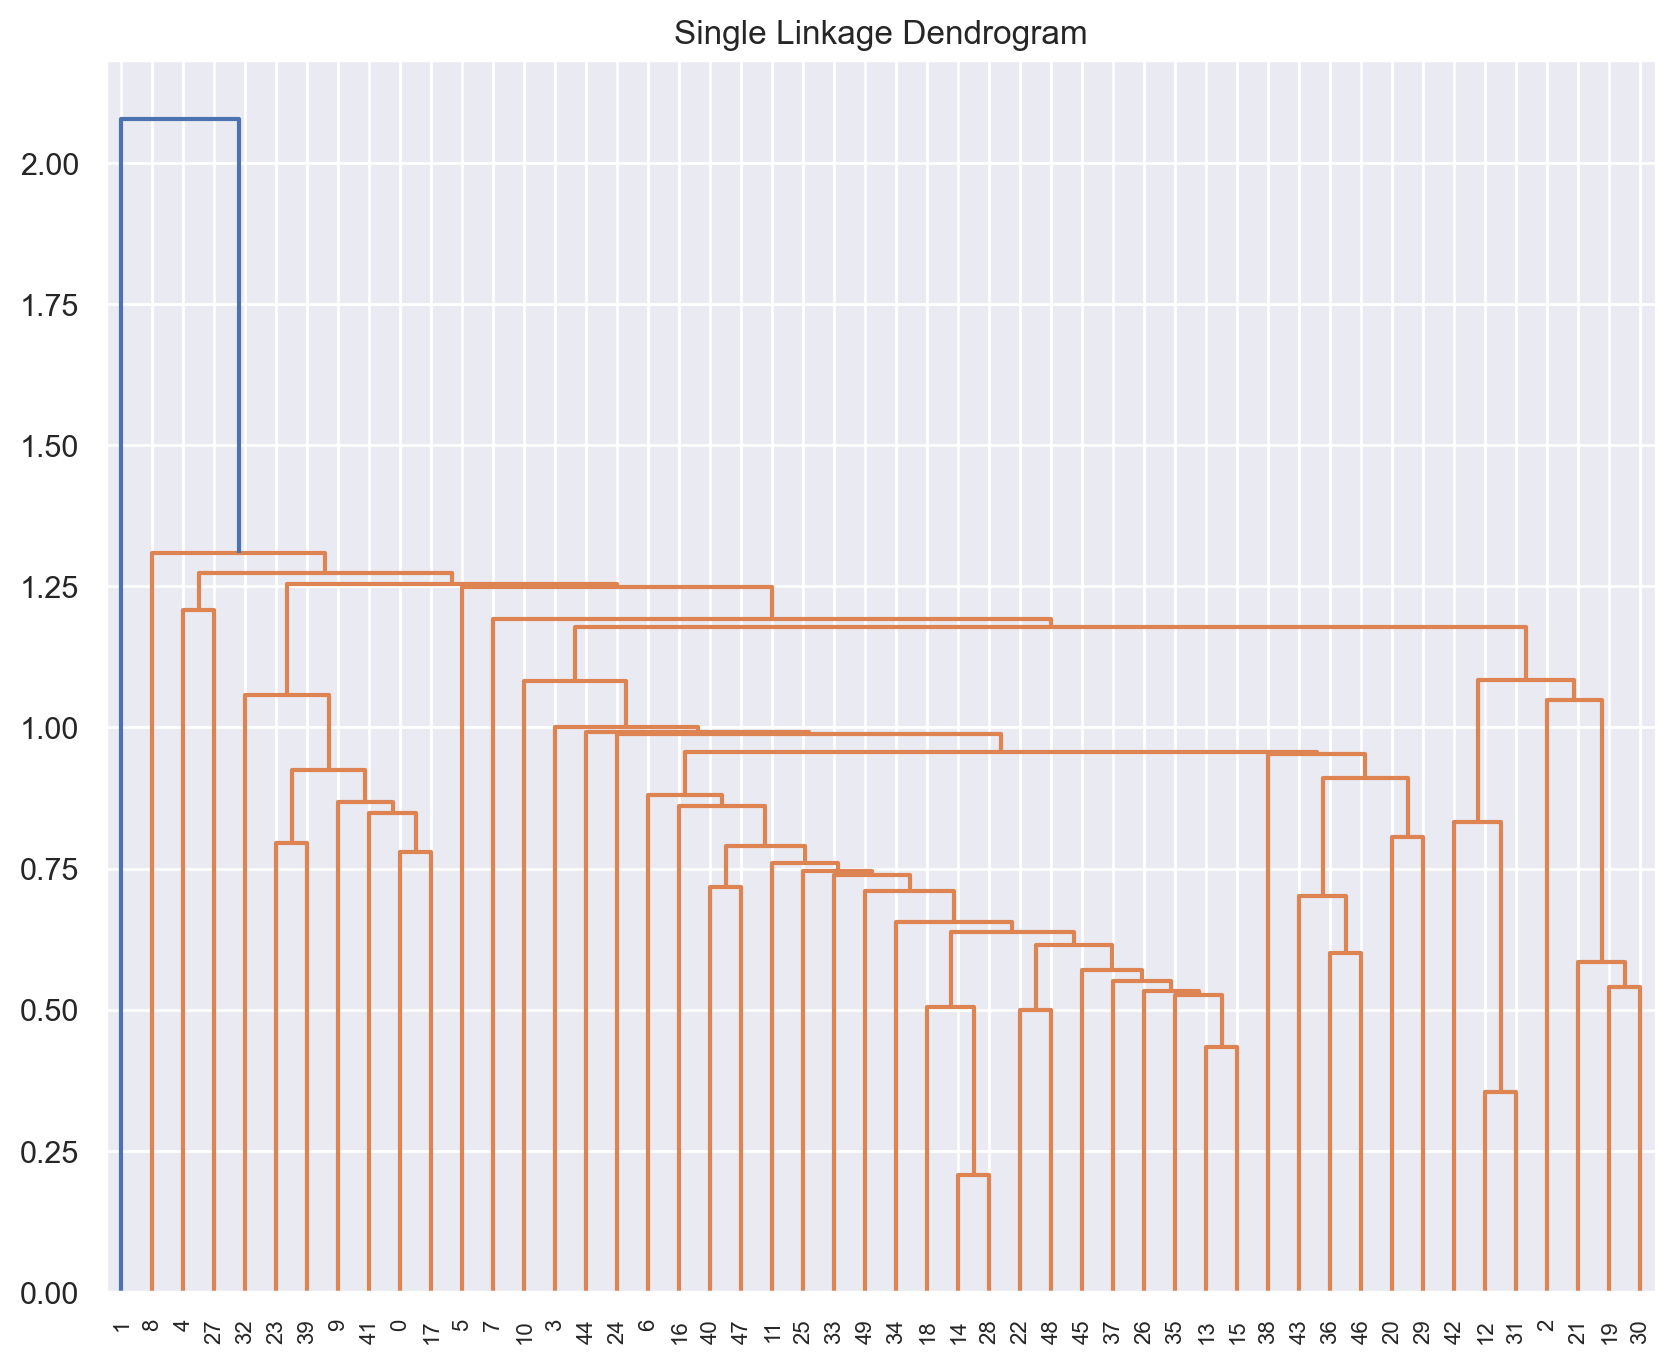

In [17]:
lk = hierarchy.linkage(x, method = 'single')
dendrogram = hierarchy.dendrogram(lk)
plt.title('Single Linkage Dendrogram')
plt.show()

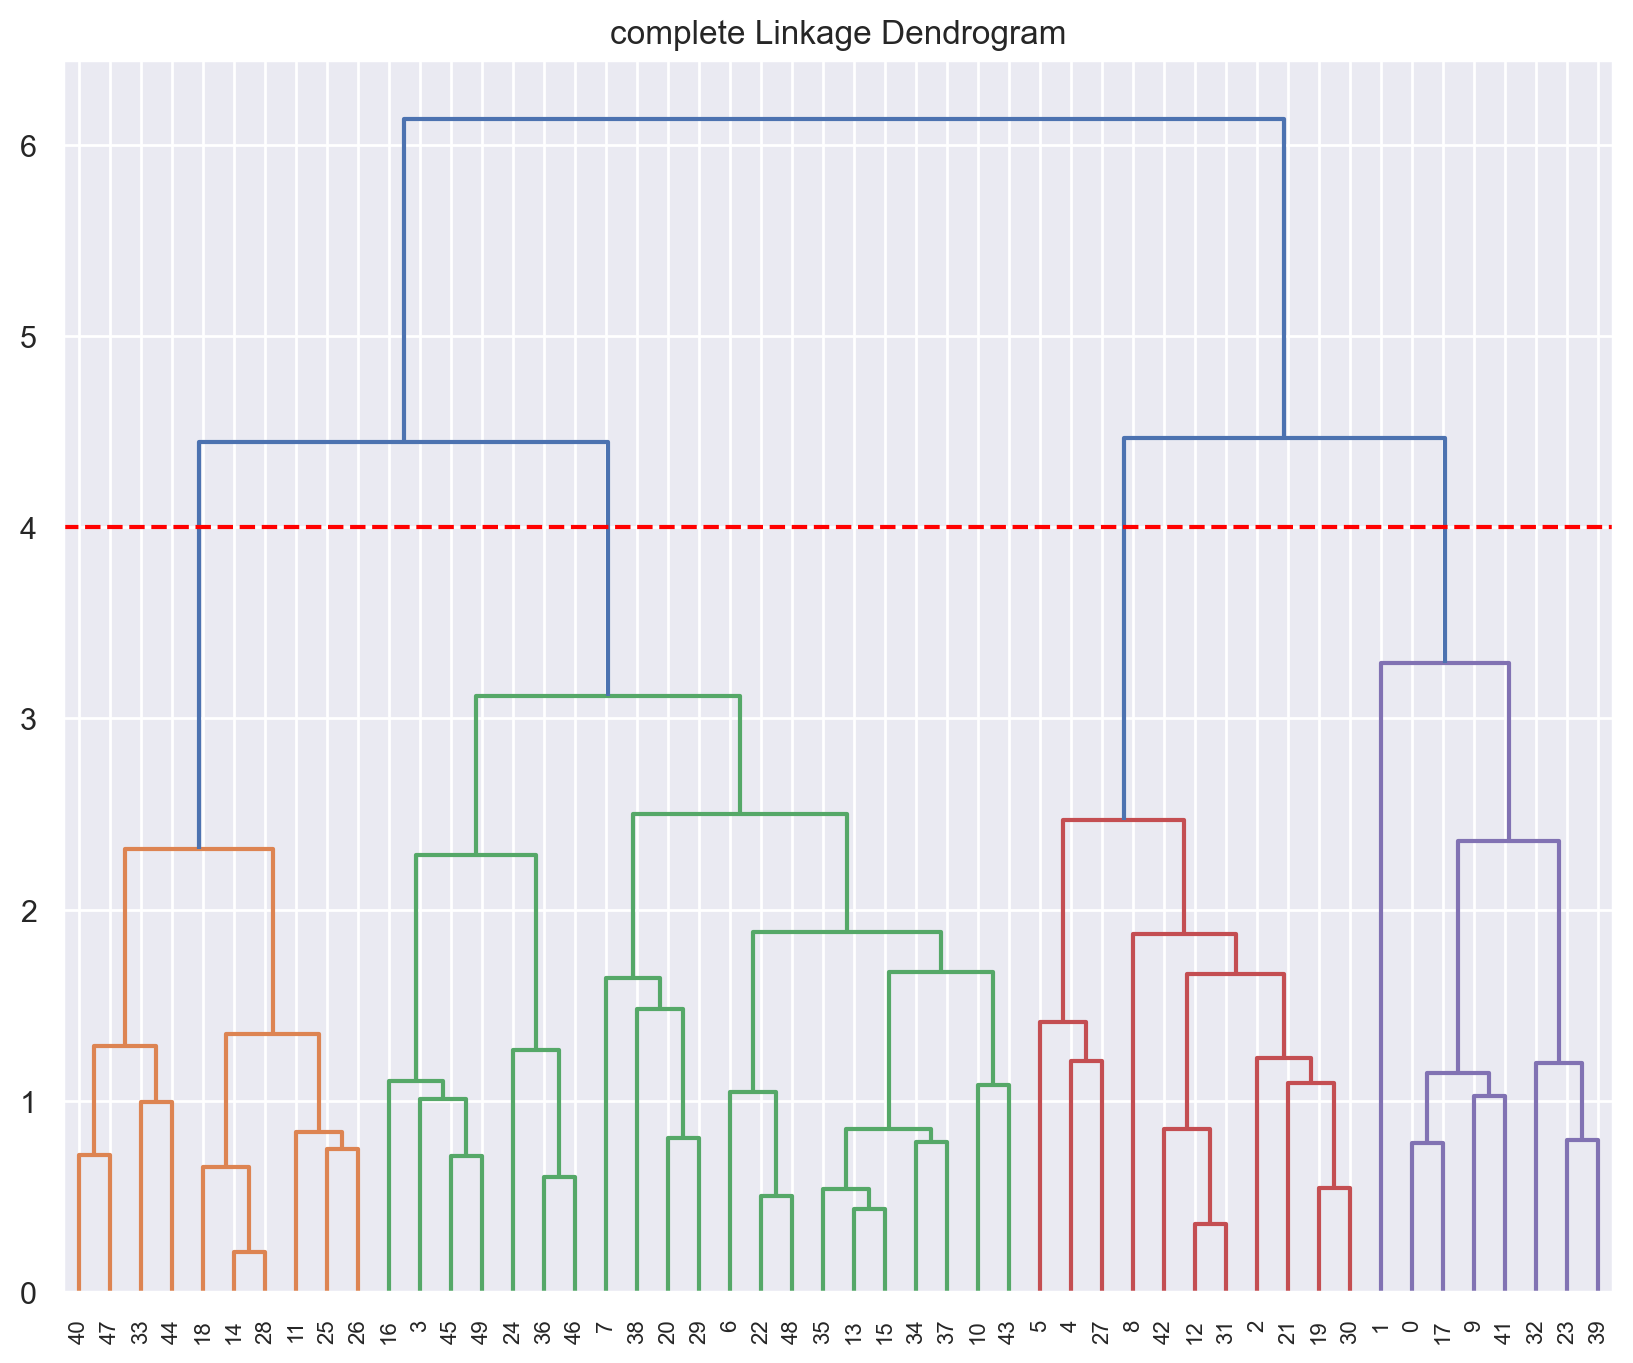

In [18]:
lk = hierarchy.linkage(x, method = 'complete')
dendrogram = hierarchy.dendrogram(lk)
plt.title('complete Linkage Dendrogram')
plt.axhline(y = 4, linestyle = '--', color = 'red')
plt.show()

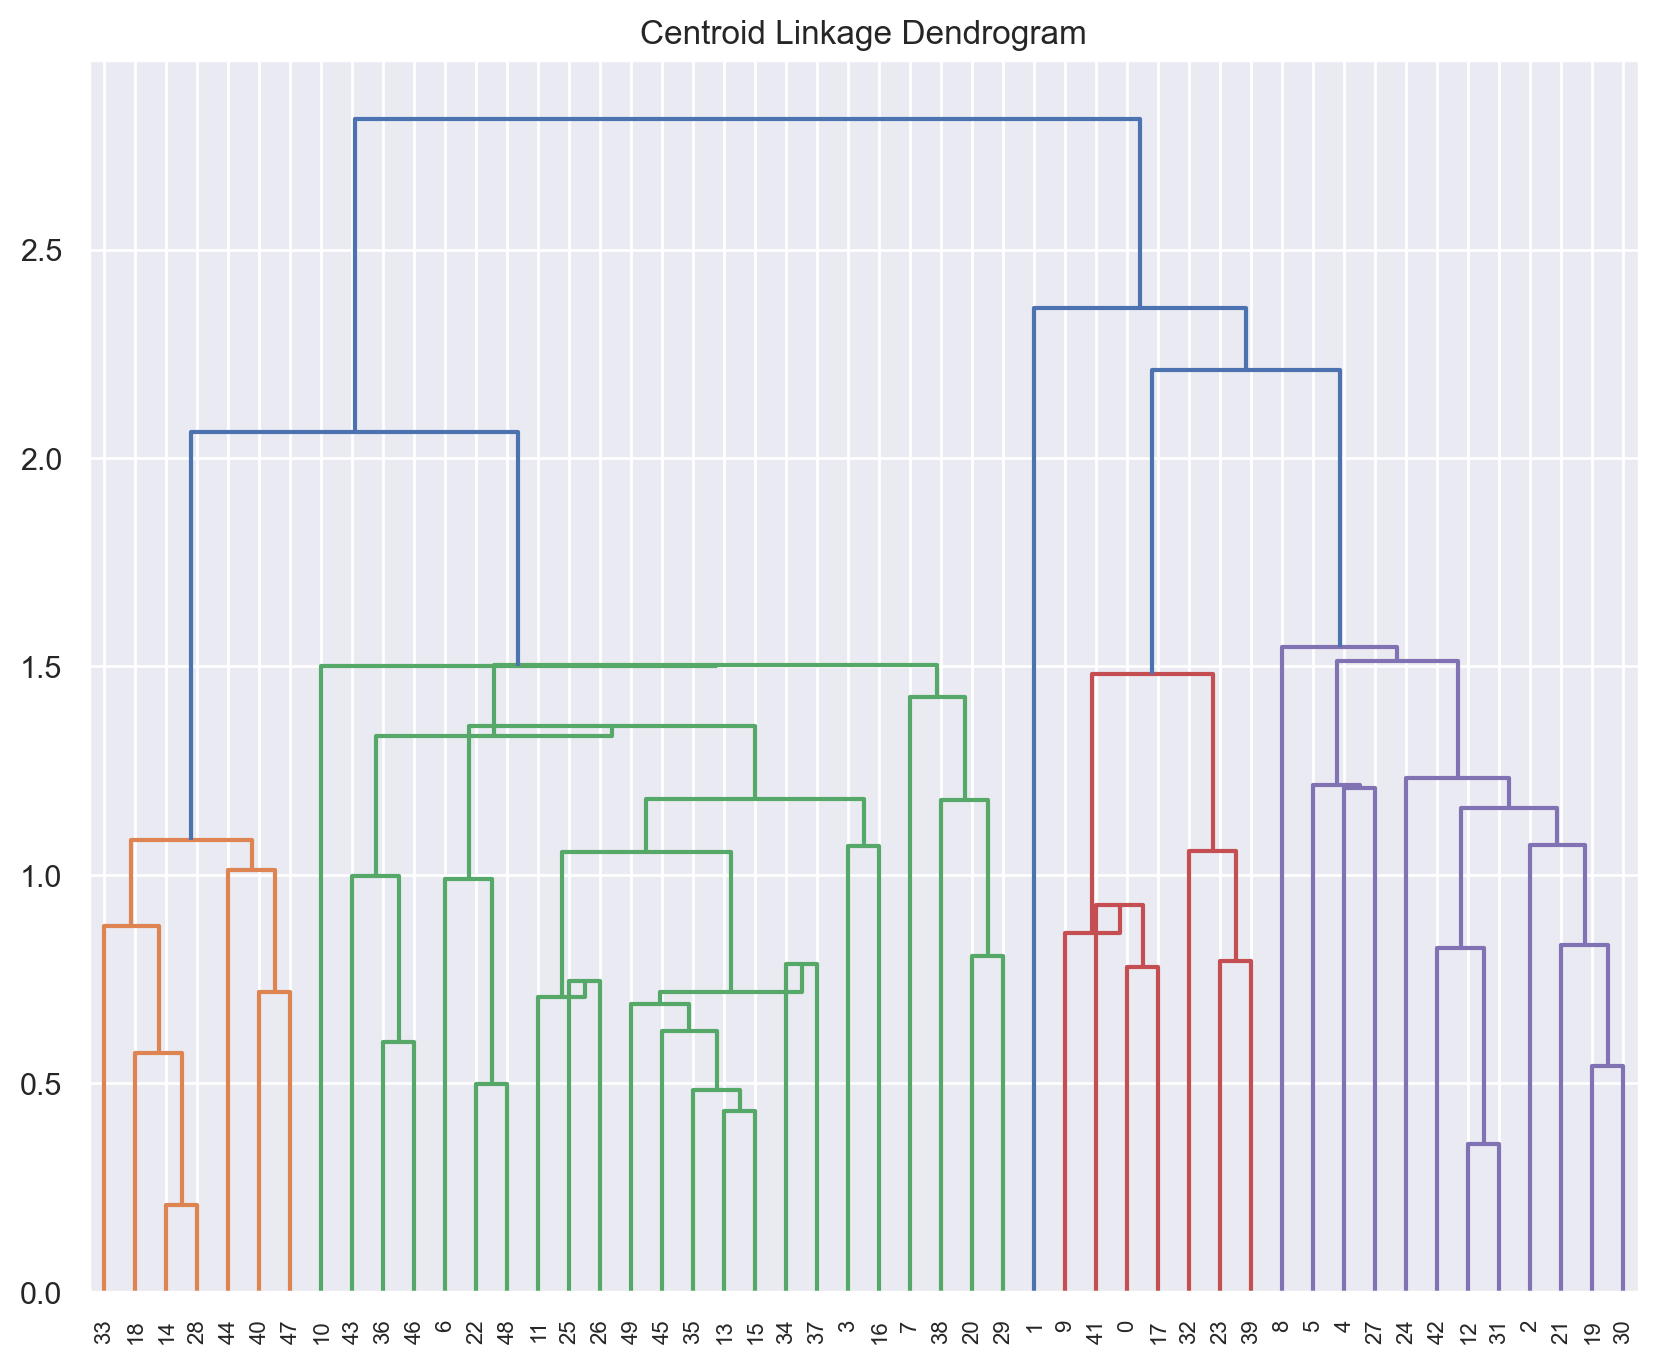

In [19]:
lk = hierarchy.linkage(x, method='centroid')
hierarchy.dendrogram(lk)
plt.title('Centroid Linkage Dendrogram')
plt.show()

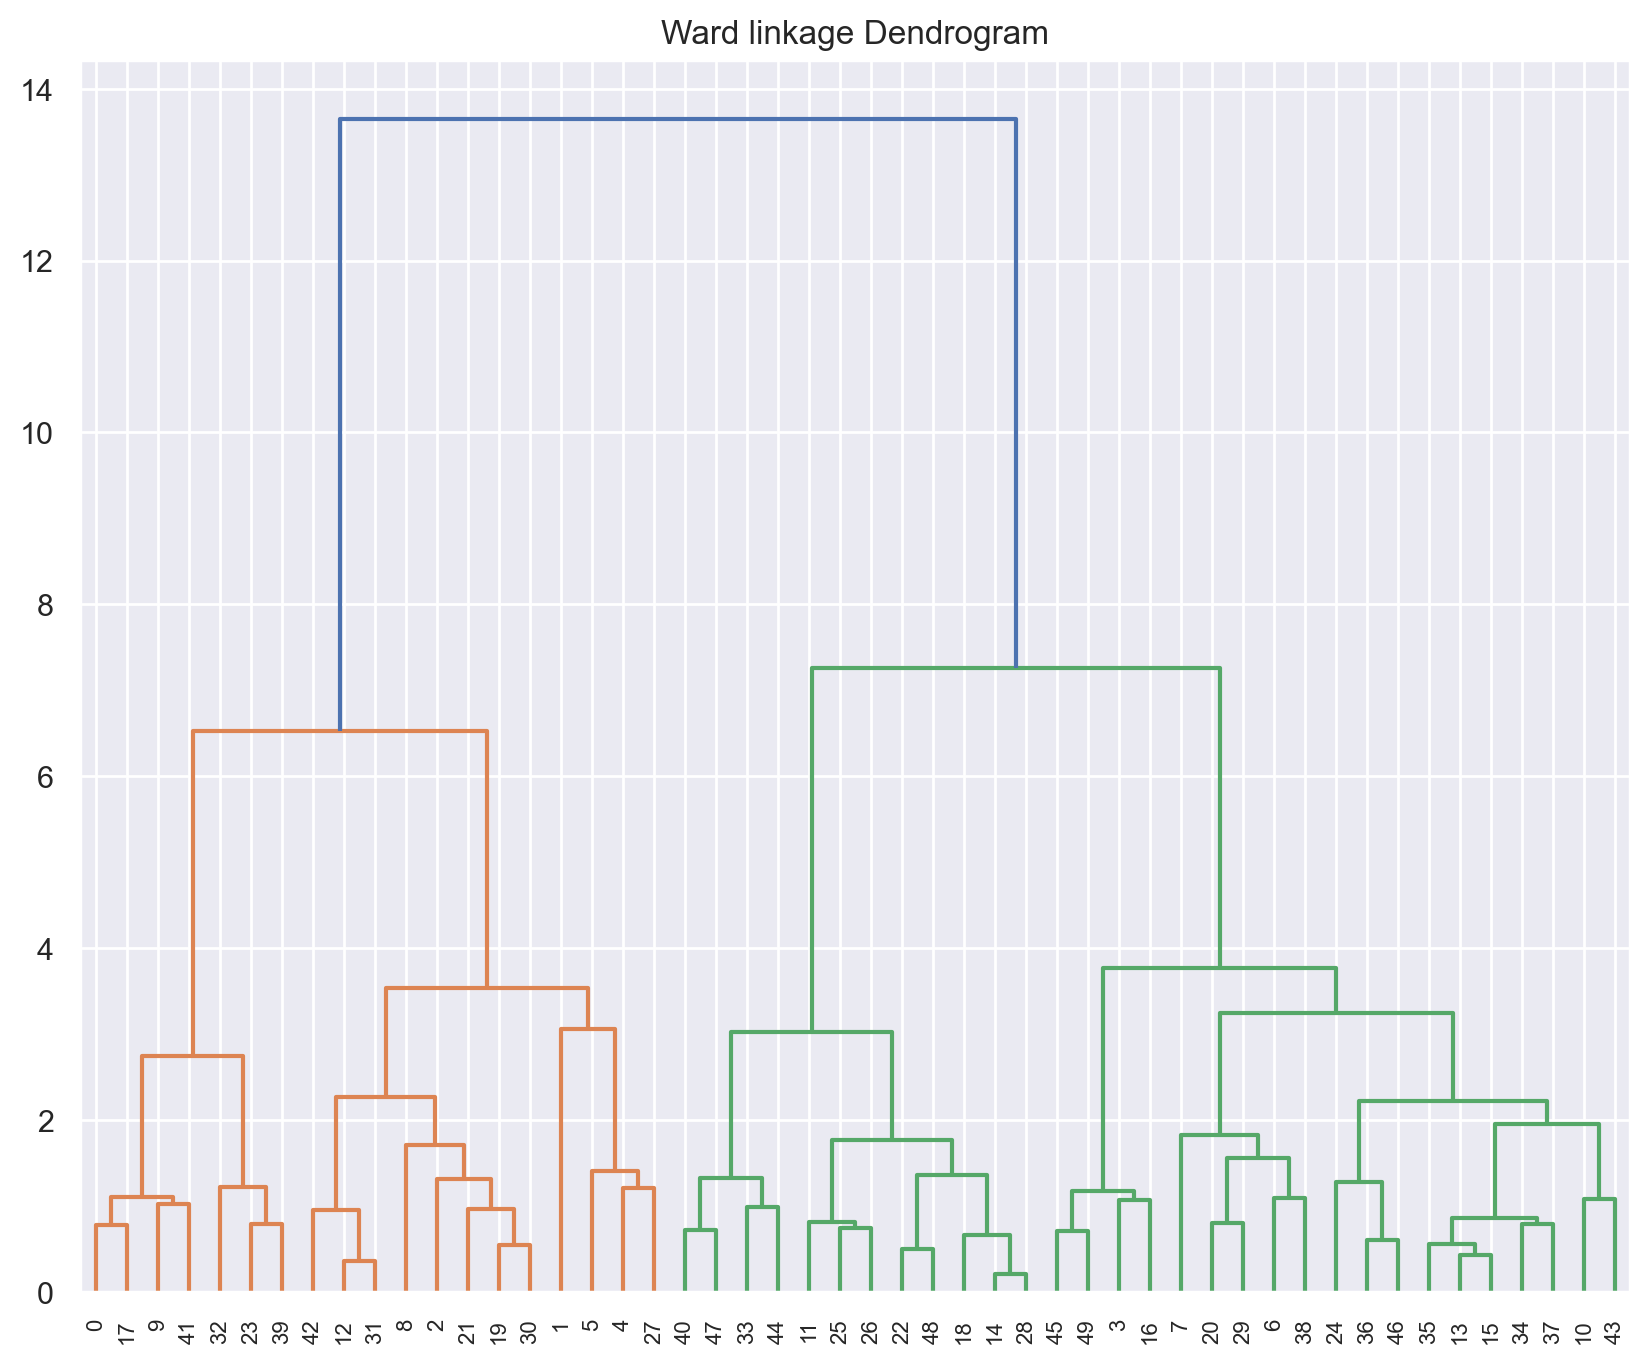

In [20]:
lk = hierarchy.linkage(x, method = 'ward')
hierarchy.dendrogram(lk)
plt.title('Ward linkage Dendrogram')
plt.show()

In [21]:
# model building

In [22]:
from sklearn.cluster import AgglomerativeClustering

In [23]:
hc = AgglomerativeClustering(n_clusters = 3)

ypred = hc.fit_predict(x)
ypred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1], dtype=int64)

In [24]:
df['Agg_cluster'] = ypred

In [25]:
df

,State,Murder,Assault,UrbanPop,Rape,Agg_cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [26]:
df.groupby('Agg_cluster').mean()

,Murder,Assault,UrbanPop,Rape
Agg_cluster,,,,
0,12.331579,259.315789,68.315789,29.215789
1,6.210526,142.052632,71.263158,19.184211
2,3.091667,76.000000,52.083333,11.833333


In [27]:
df['Agg_cluster'].value_counts()

0    19
1    19
2    12
Name: Agg_cluster, dtype: int64

<Axes: xlabel='Murder', ylabel='Assault'>

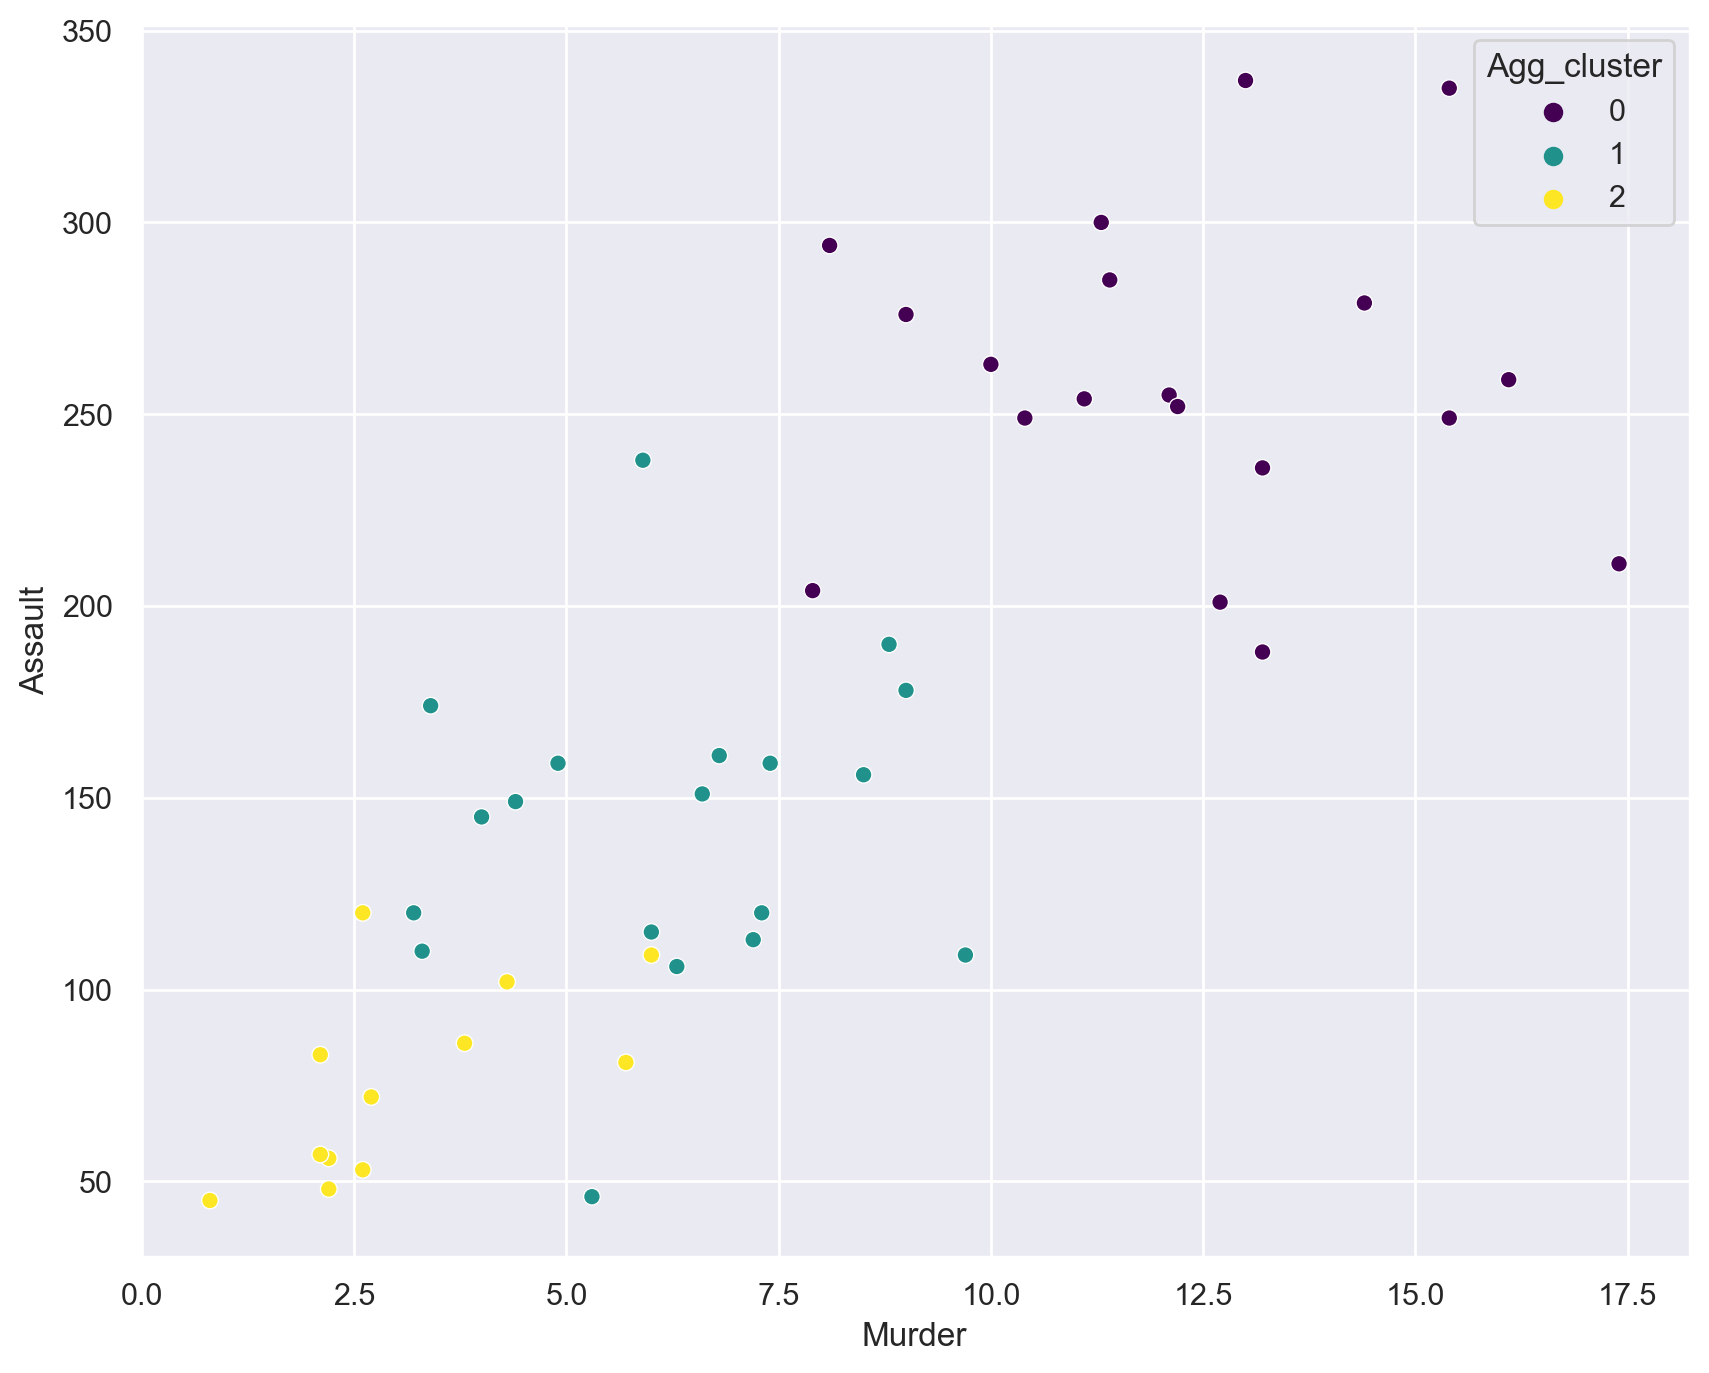

In [28]:
sns.scatterplot(x = df['Murder'], y = df['Assault'], hue = df['Agg_cluster'],  palette='viridis')

# K-Means Clustering

In [29]:
km = KMeans()
yp = km.fit_predict(x)
yp

array([2, 1, 6, 0, 6, 6, 5, 0, 6, 2, 5, 4, 3, 0, 4, 0, 0, 2, 4, 6, 5, 6,
       4, 2, 3, 0, 0, 6, 4, 5, 6, 3, 2, 7, 0, 0, 0, 5, 5, 2, 7, 2, 3, 5,
       7, 0, 0, 7, 4, 0])

In [30]:
km.cluster_centers_

array([[-0.27195908, -0.32809294, -0.13968167, -0.1602466 ],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [ 0.69855875,  0.60290854,  0.99167546,  0.50883024],
       [-1.25347849, -1.17890802, -0.50293276, -1.0585711 ],
       [-0.7029322 , -0.57371376,  1.13872696, -0.556561  ],
       [ 0.7275494 ,  1.26502915,  0.84337776,  1.52800061],
       [-1.08146728, -1.28193823, -1.78236392, -1.19517947]])

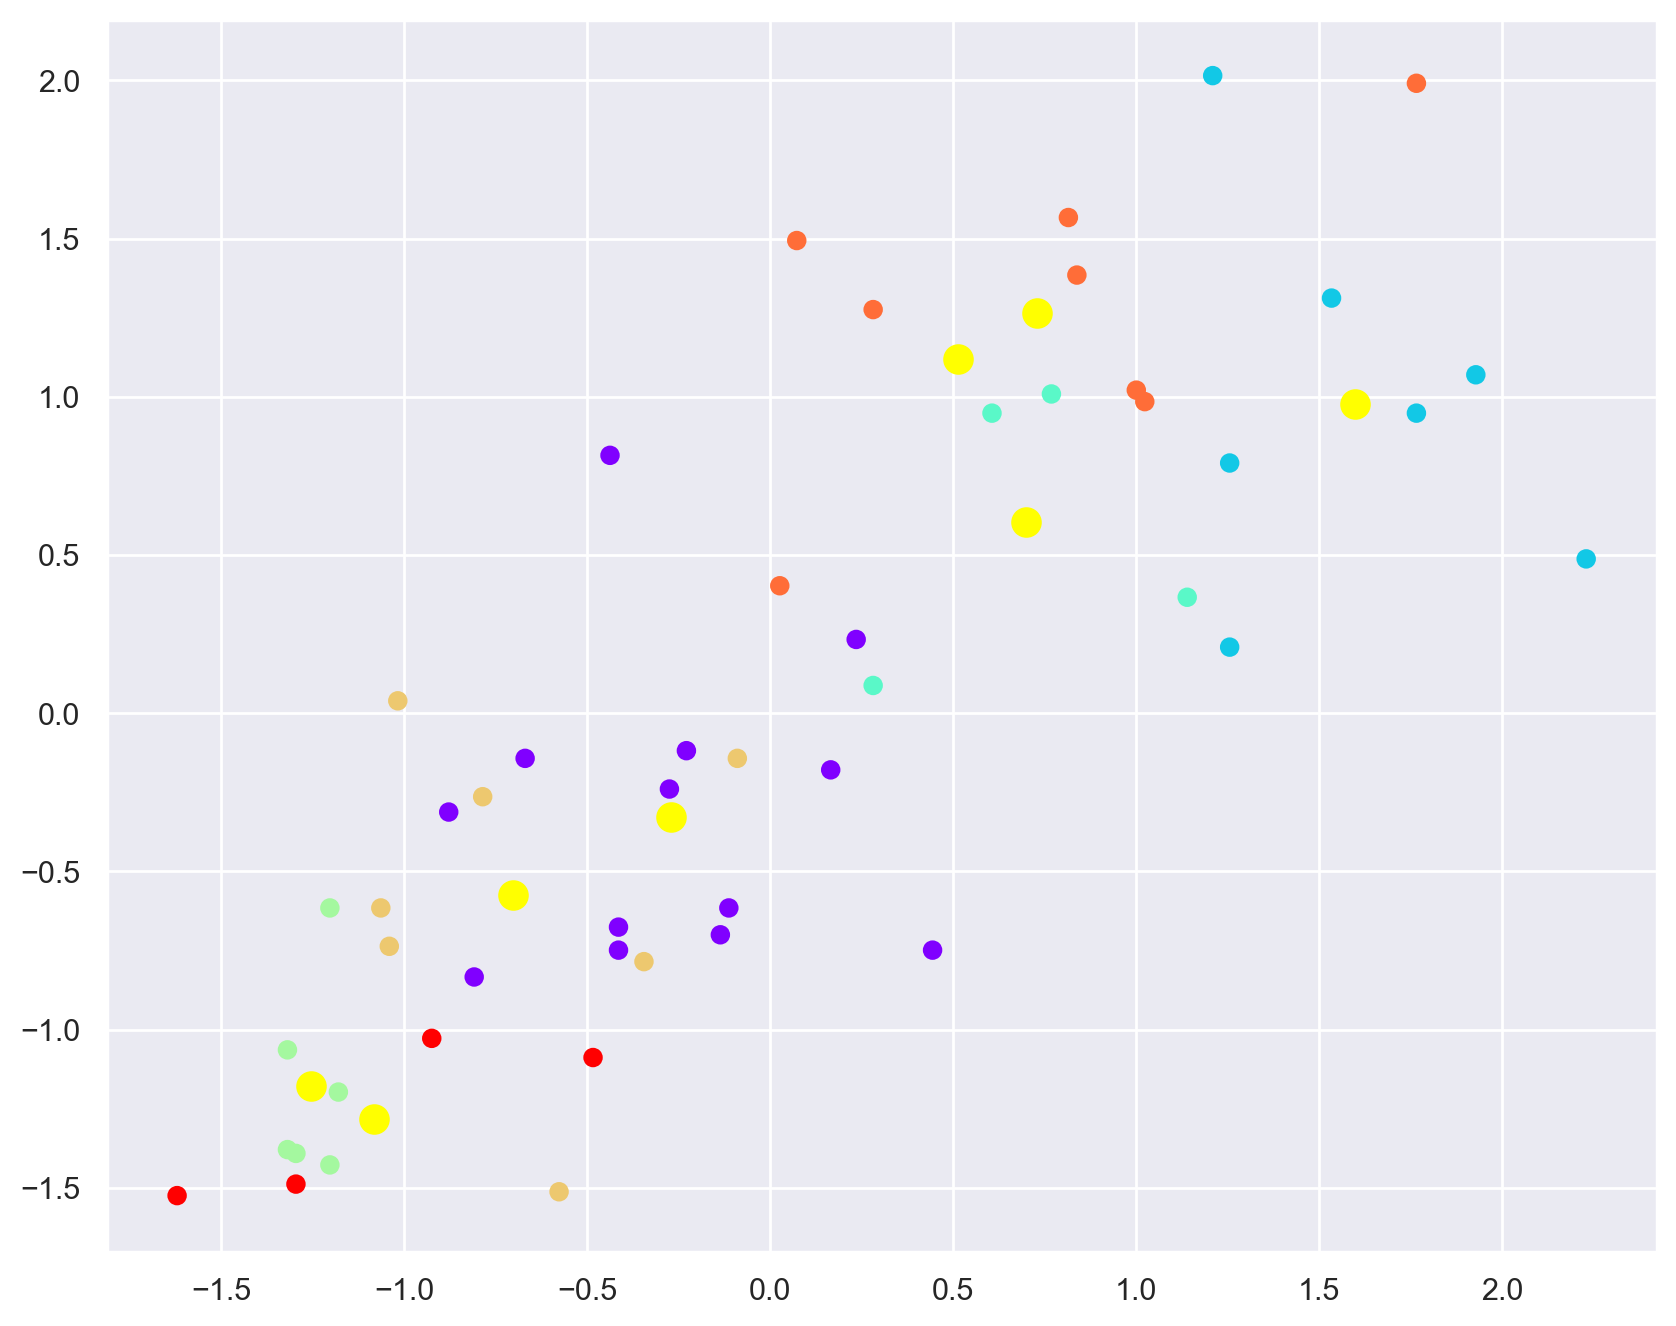

In [31]:
plt.scatter(x[:,0],x[:,1], c = yp, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow', s = 100)

In [32]:
km.inertia_

36.429734418660324

In [33]:
from sklearn.metrics import silhouette_score

In [34]:
silhouette_score(x, yp)

0.24291883858201782

In [35]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters = i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [36]:
wcss

[200.0,
 104.96163315756871,
 80.08569526137276,
 57.55425863091104,
 49.94306447936138,
 44.90742258933344,
 39.08587660656566,
 34.73506342602934,
 31.912213342876356,
 27.421391951576272]

Text(0.5, 1.0, 'Elbow Graph')

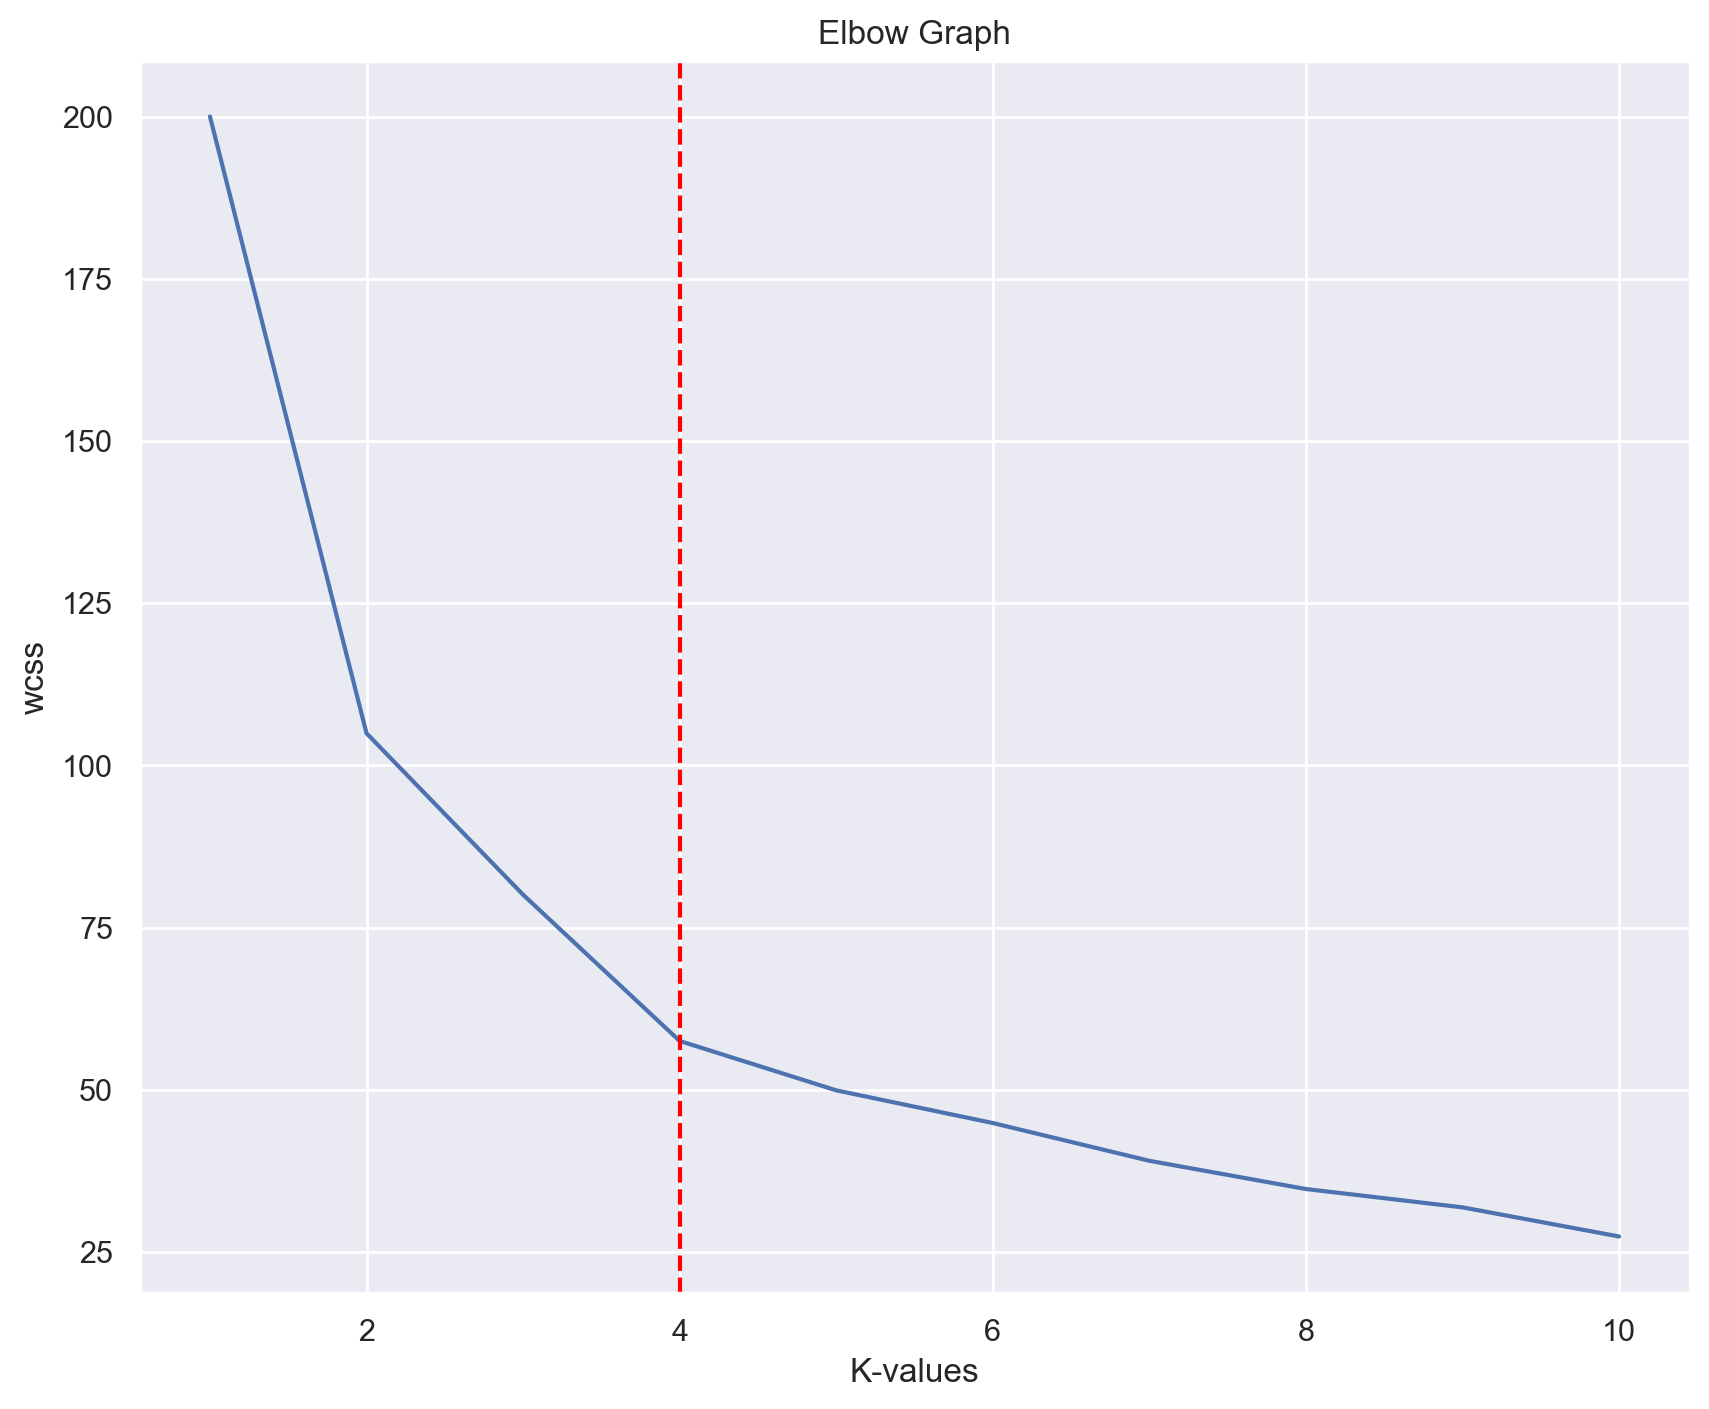

In [37]:
plt.plot(range(1,11),wcss)
plt.axvline(x = 4, linestyle = '--', color = 'red')
plt.xlabel('K-values')
plt.ylabel('wcss')
plt.title('Elbow Graph')

In [38]:
km = KMeans(n_clusters = 4)
km_ypred = km.fit_predict(x)
km_ypred

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 1, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

In [39]:
km.cluster_centers_

array([[-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669]])

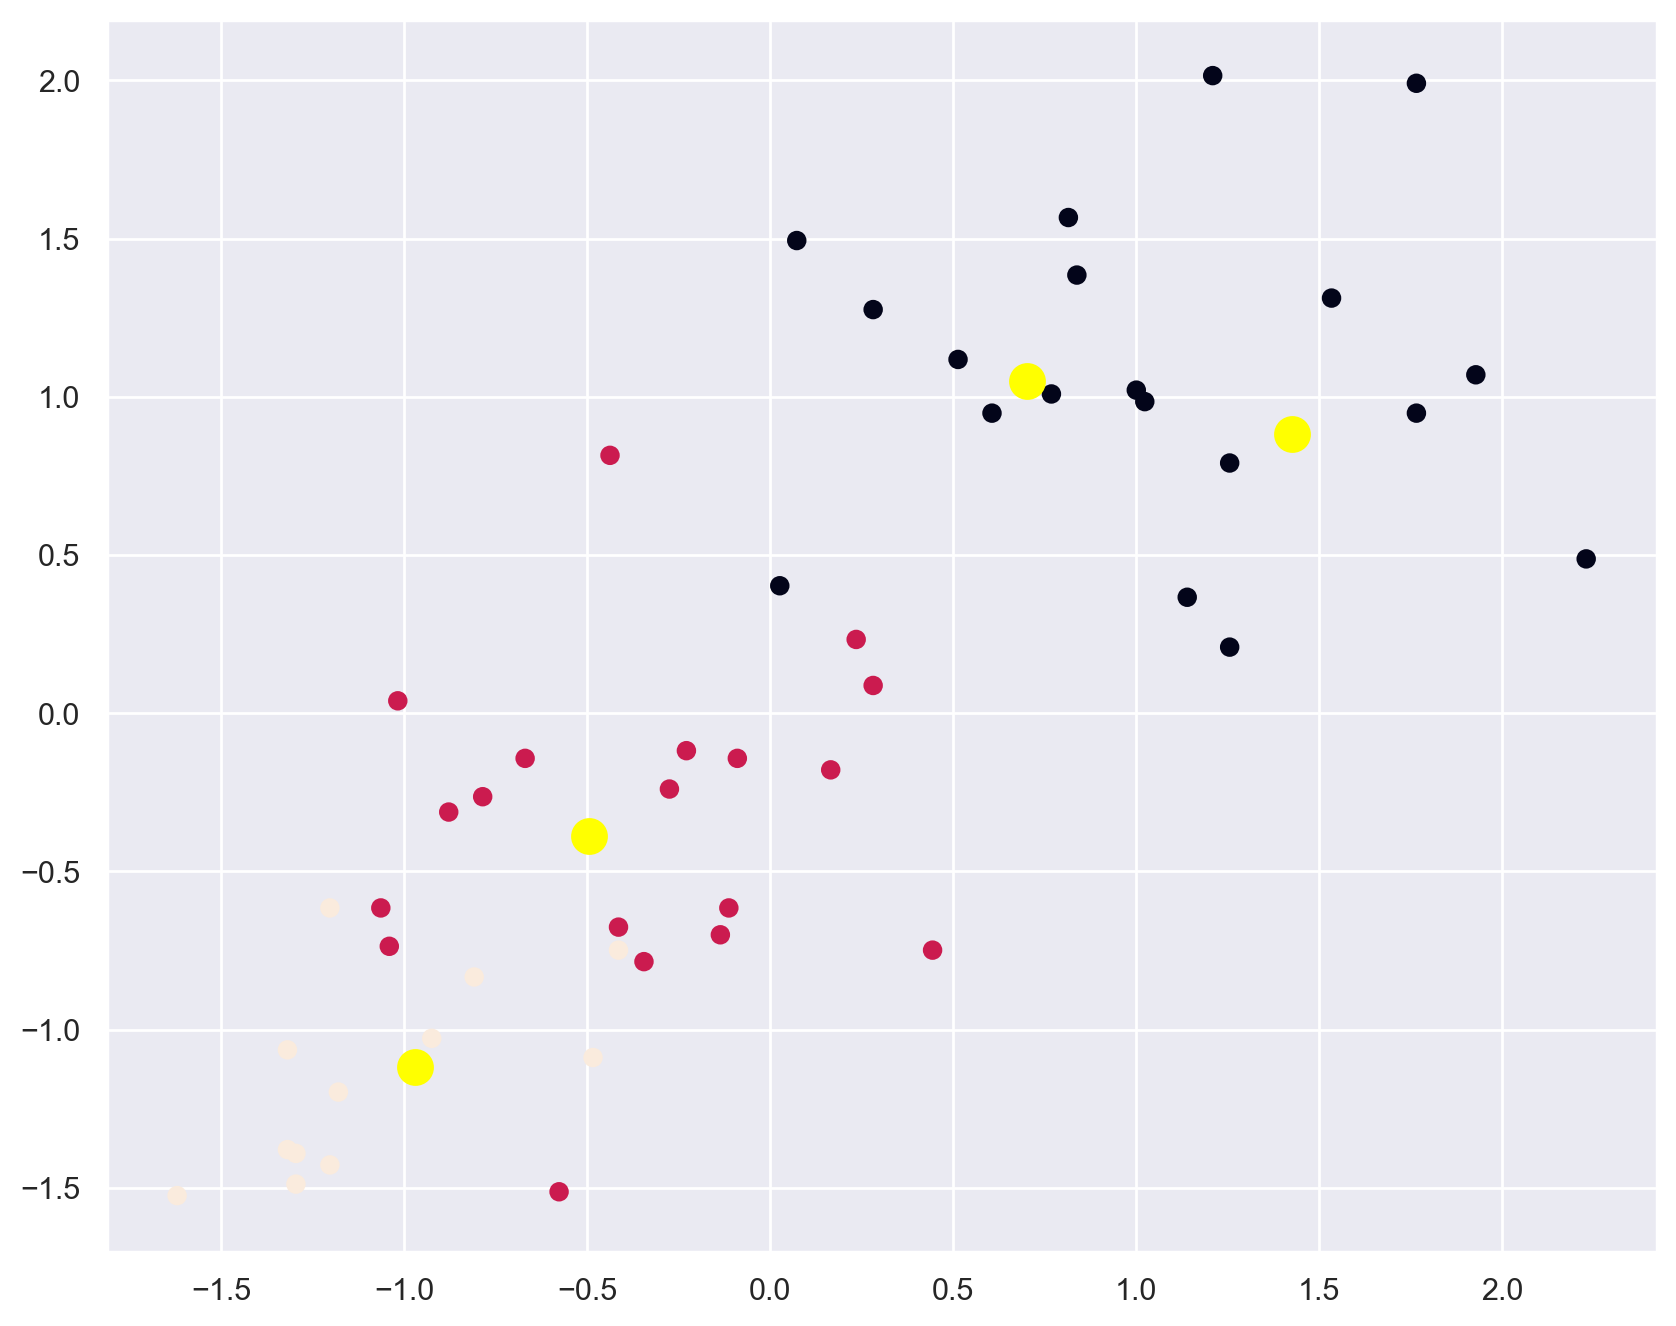

In [40]:
plt.scatter(x[:,0], x[:,1], c = ypred)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c = 'yellow', s = 150)

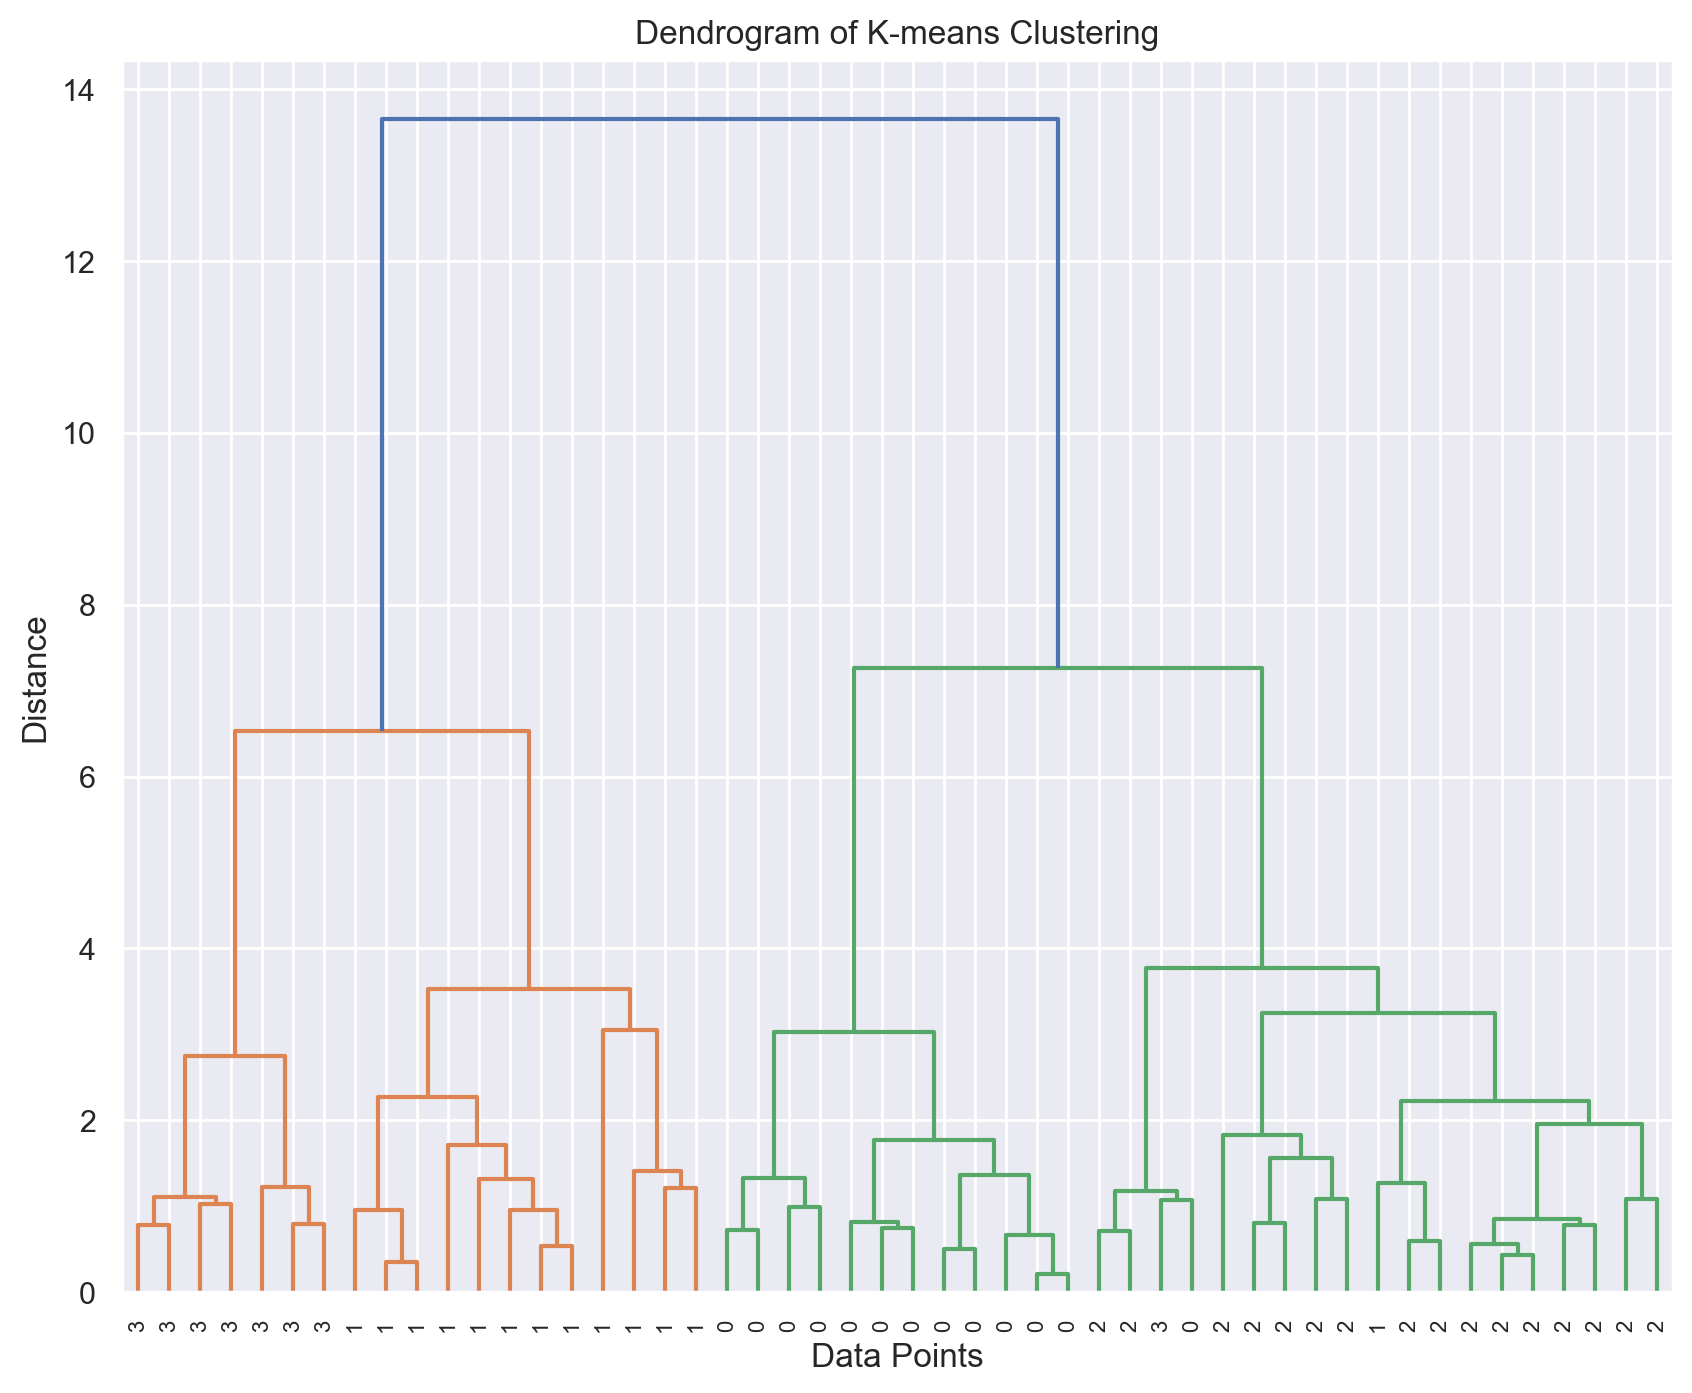

In [41]:
linkage_matrix = hierarchy.linkage(x,'ward')

hierarchy.dendrogram(linkage_matrix, labels = km_ypred)
plt.title('Dendrogram of K-means Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [42]:
silhouette_score(x, km_ypred)

0.33968891433344395

In [43]:
df['KMean_cluster'] = km_ypred

In [44]:
df.groupby('KMean_cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape,Agg_cluster
KMean_cluster,,,,,
0,3.600000,78.538462,52.076923,12.176923,1.923077
1,10.815385,257.384615,76.000000,33.192308,0.076923
2,5.656250,138.875000,73.875000,18.781250,1.000000
3,13.937500,243.625000,53.750000,21.412500,0.125000


In [45]:
df['KMean_cluster'].value_counts()

2    16
1    13
0    13
3     8
Name: KMean_cluster, dtype: int64

# DBSCAN

In [46]:
db = DBSCAN(eps = 0.7, min_samples = 3)
y = db.fit_predict(x)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0, -1,
       -1,  0,  1, -1,  1,  0, -1, -1, -1,  0, -1,  0, -1,  1, -1, -1, -1,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1],
      dtype=int64)

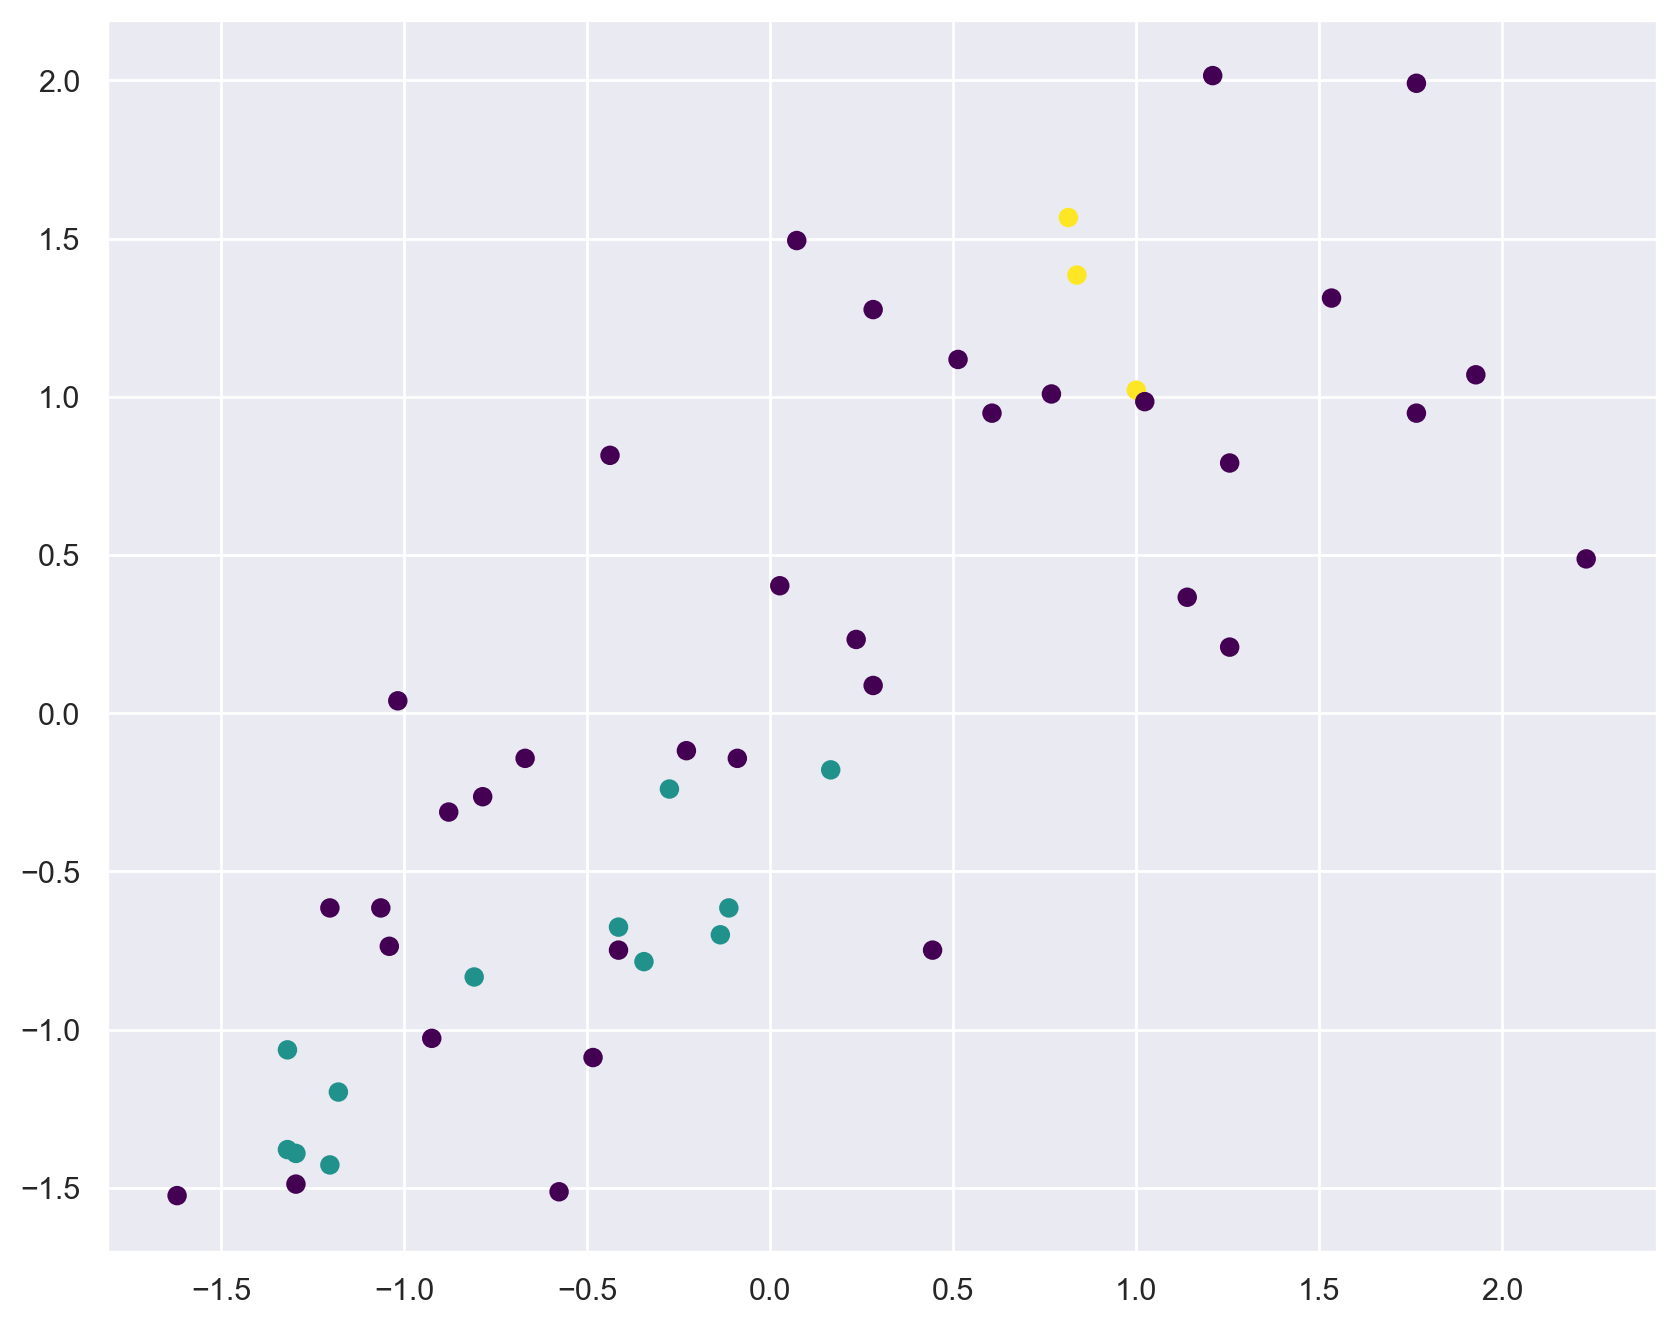

In [47]:
plt.scatter(x[:,0],x[:,1],c = y,cmap = 'viridis')

In [48]:
from sklearn.metrics import silhouette_score

In [49]:
silhouette_score(x,y)

-0.09867491985225028

In [50]:
#Hyperparameter tunning

In [51]:
from sklearn.neighbors import NearestNeighbors

In [52]:
neigh = NearestNeighbors(n_neighbors=3).fit(x)

In [53]:
d,index = neigh.kneighbors(x)

In [54]:
d

array([[0.        , 0.78006247, 0.84928467],
       [0.        , 2.07898369, 2.13697134],
       [0.        , 1.0482199 , 1.08341076],
       [0.        , 1.0013278 , 1.00722663],
       [0.        , 1.20897691, 1.30069114],
       [0.        , 1.24886253, 1.30069114],
       [0.        , 0.88100359, 0.95643249],
       [0.        , 1.19227586, 1.27140067],
       [0.        , 1.30974334, 1.34926273],
       [0.        , 0.86797806, 1.02250187],
       [0.        , 1.08184506, 1.16110091],
       [0.        , 0.75913104, 0.81522244],
       [0.        , 0.35377437, 0.83250223],
       [0.        , 0.43312429, 0.53571007],
       [0.        , 0.2079438 , 0.63822131],
       [0.        , 0.43312429, 0.52515083],
       [0.        , 0.8610239 , 1.07057017],
       [0.        , 0.78006247, 0.86797806],
       [0.        , 0.50466926, 0.65227142],
       [0.        , 0.54082482, 1.09106451],
       [0.        , 0.80586349, 0.91073424],
       [0.        , 0.58411812, 1.09106451],
       [0.

In [55]:
distance = np.sort(d[:,1])
distance

array([0.2079438 , 0.2079438 , 0.35377437, 0.35377437, 0.43312429,
       0.43312429, 0.49909939, 0.49909939, 0.50466926, 0.52515083,
       0.53326883, 0.54082482, 0.54082482, 0.55122406, 0.57035779,
       0.58411812, 0.59956023, 0.59956023, 0.65497312, 0.70111326,
       0.71097658, 0.71809843, 0.71809843, 0.73797792, 0.74649625,
       0.75913104, 0.78006247, 0.78006247, 0.79455301, 0.79455301,
       0.80586349, 0.80586349, 0.83250223, 0.84928467, 0.8610239 ,
       0.86797806, 0.88100359, 0.95367898, 0.98866758, 0.99246041,
       1.0013278 , 1.0482199 , 1.0582674 , 1.08184506, 1.19227586,
       1.20897691, 1.20897691, 1.24886253, 1.30974334, 2.07898369])

Text(0.5, 1.0, 'K-Distance Graph')

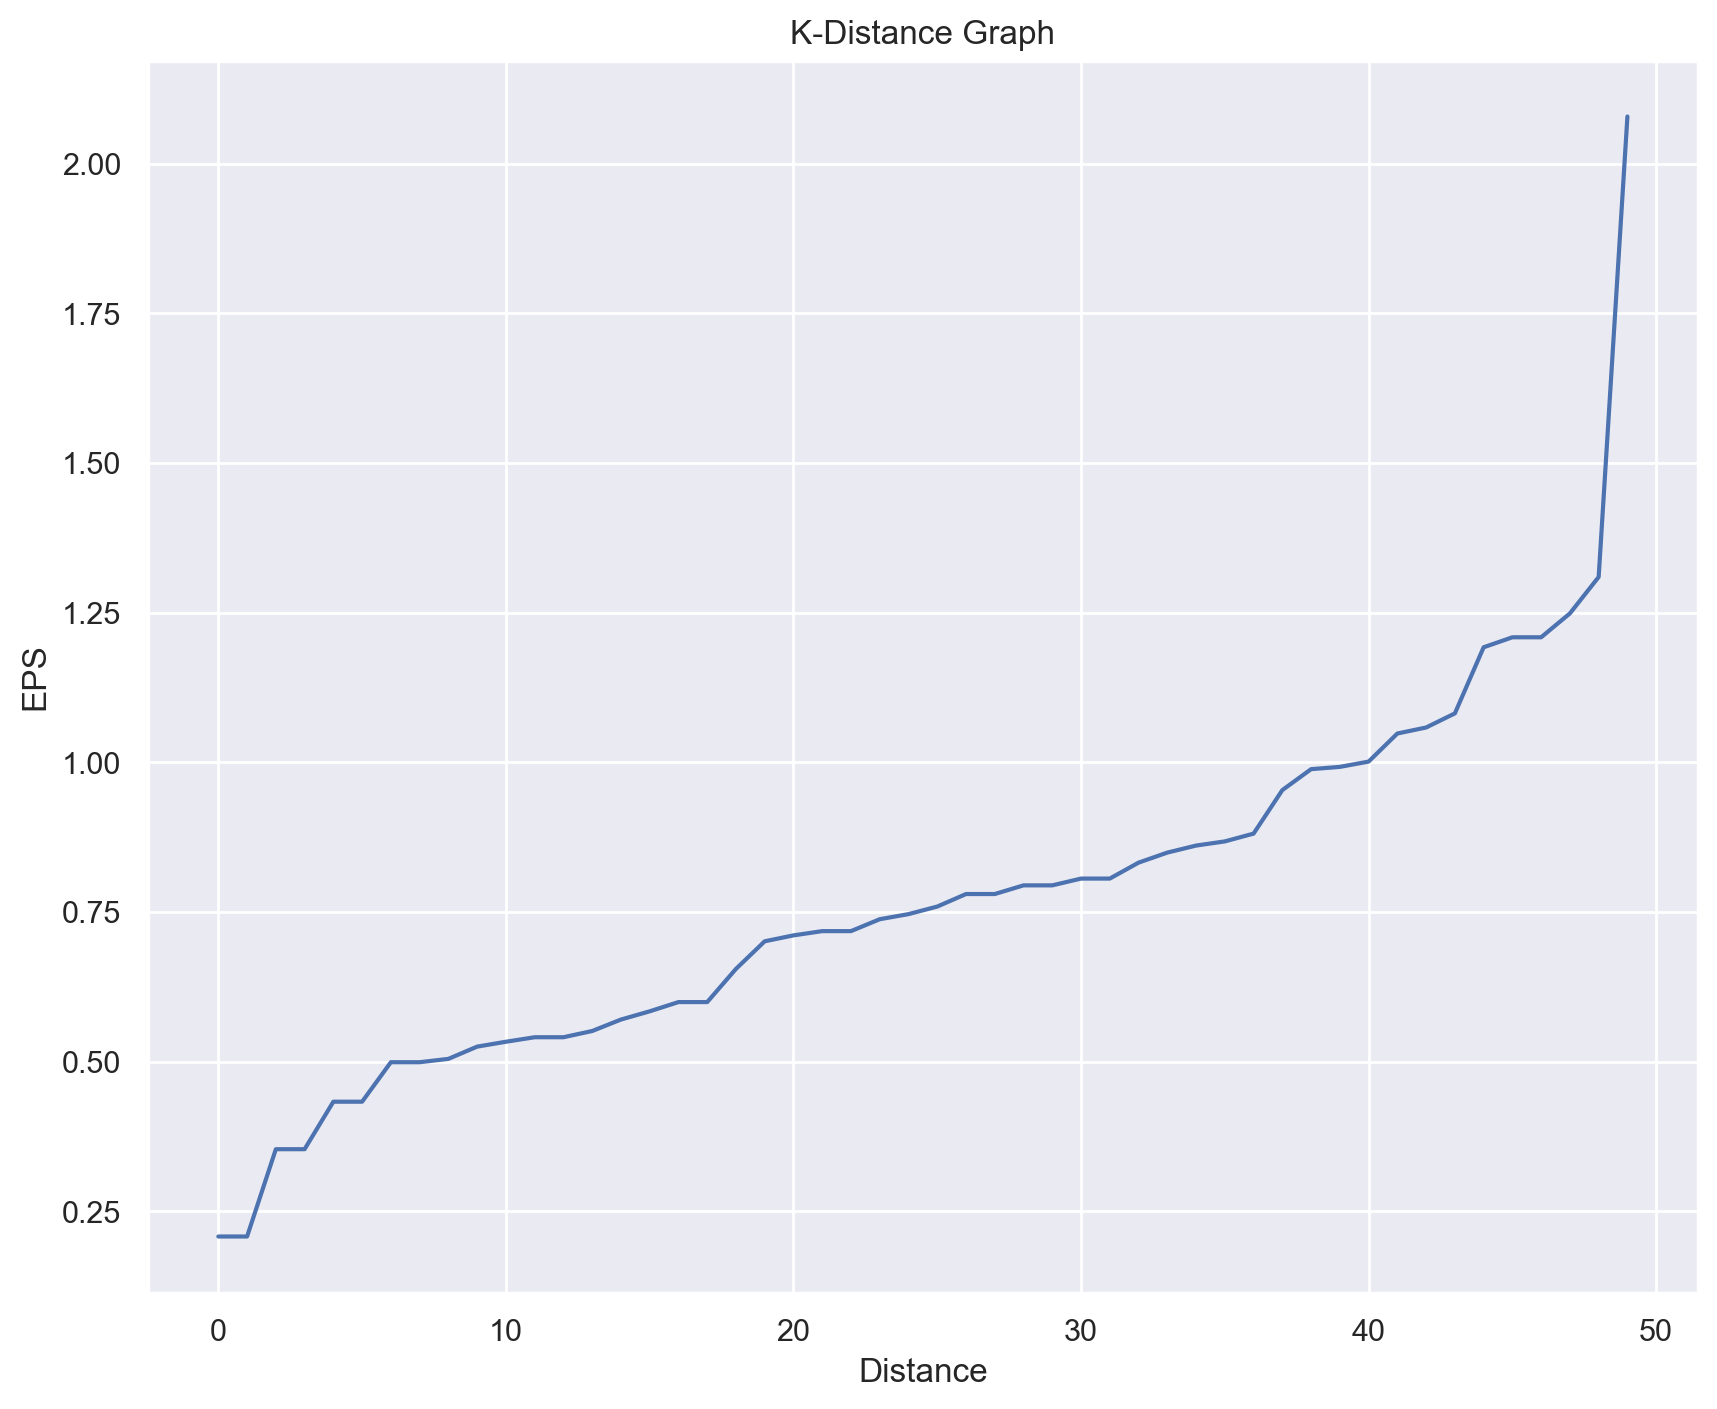

In [56]:
plt.plot(distance)
plt.xlabel('Distance')
plt.ylabel('EPS')
plt.title('K-Distance Graph')


In [57]:
db = DBSCAN(eps = 0.98, min_samples=3)
db_ypred = db.fit_predict(x)
db_ypred

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0, -1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1, -1,  1,  1,  1,  1,  1],
      dtype=int64)

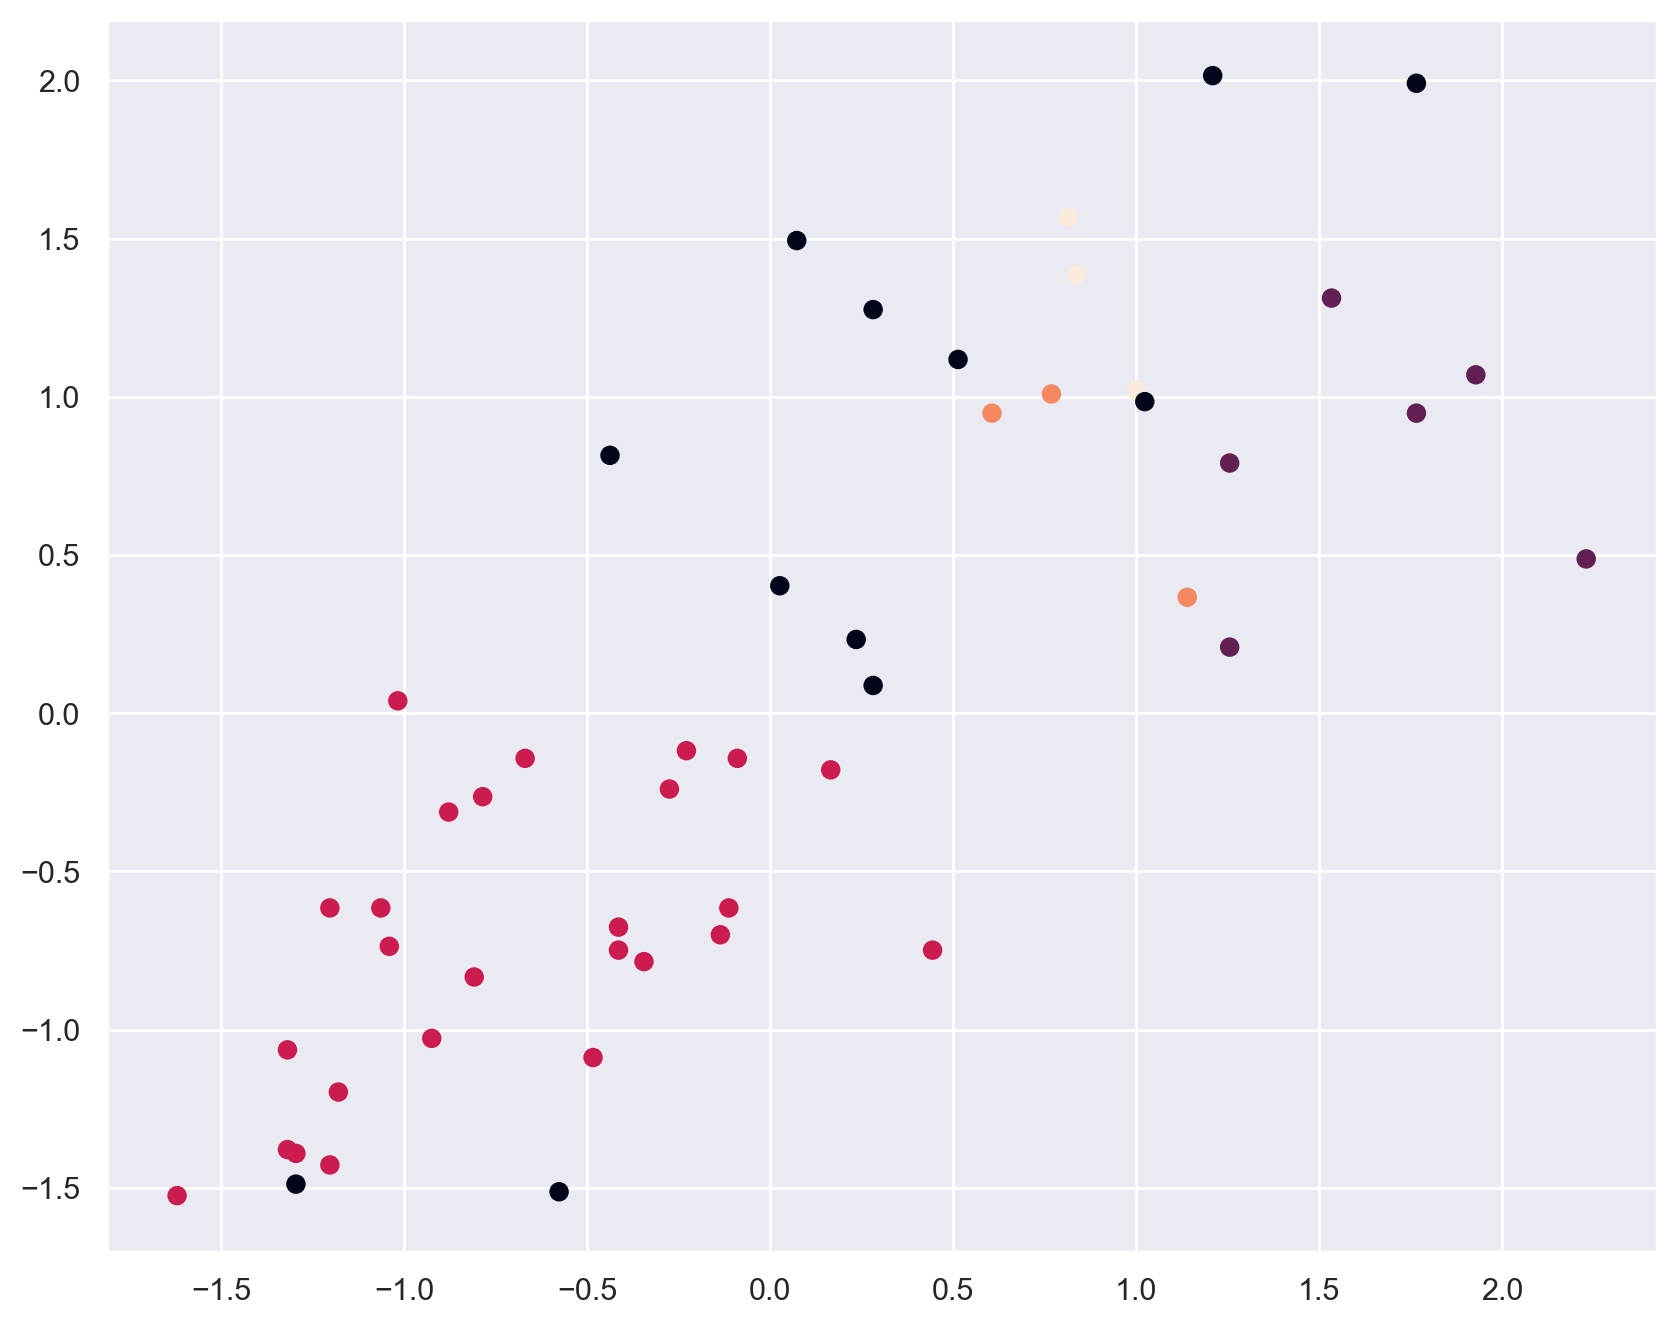

In [58]:
plt.scatter(x[:,0], x[:,1], c = db_ypred)

In [59]:
silhouette_score(x,db_ypred)

0.17942785119523086

In [60]:
df['DB_cluster'] = db_ypred
df

,State,Murder,Assault,UrbanPop,Rape,Agg_cluster,KMean_cluster,DB_cluster
0,Alabama,13.2,236,58,21.2,0,3,0
1,Alaska,10.0,263,48,44.5,0,1,-1
2,Arizona,8.1,294,80,31.0,0,1,-1
3,Arkansas,8.8,190,50,19.5,1,3,-1
4,California,9.0,276,91,40.6,0,1,-1
5,Colorado,7.9,204,78,38.7,0,1,-1
6,Connecticut,3.3,110,77,11.1,1,2,1
7,Delaware,5.9,238,72,15.8,1,2,-1
8,Florida,15.4,335,80,31.9,0,1,-1
9,Georgia,17.4,211,60,25.8,0,3,0


In [61]:
df[df['DB_cluster'] == -1]

,State,Murder,Assault,UrbanPop,Rape,Agg_cluster,KMean_cluster,DB_cluster
1,Alaska,10.0,263,48,44.5,0,1,-1
2,Arizona,8.1,294,80,31.0,0,1,-1
3,Arkansas,8.8,190,50,19.5,1,3,-1
4,California,9.0,276,91,40.6,0,1,-1
5,Colorado,7.9,204,78,38.7,0,1,-1
7,Delaware,5.9,238,72,15.8,1,2,-1
8,Florida,15.4,335,80,31.9,0,1,-1
10,Hawaii,5.3,46,83,20.2,1,2,-1
24,Missouri,9.0,178,70,28.2,1,1,-1
27,Nevada,12.2,252,81,46.0,0,1,-1


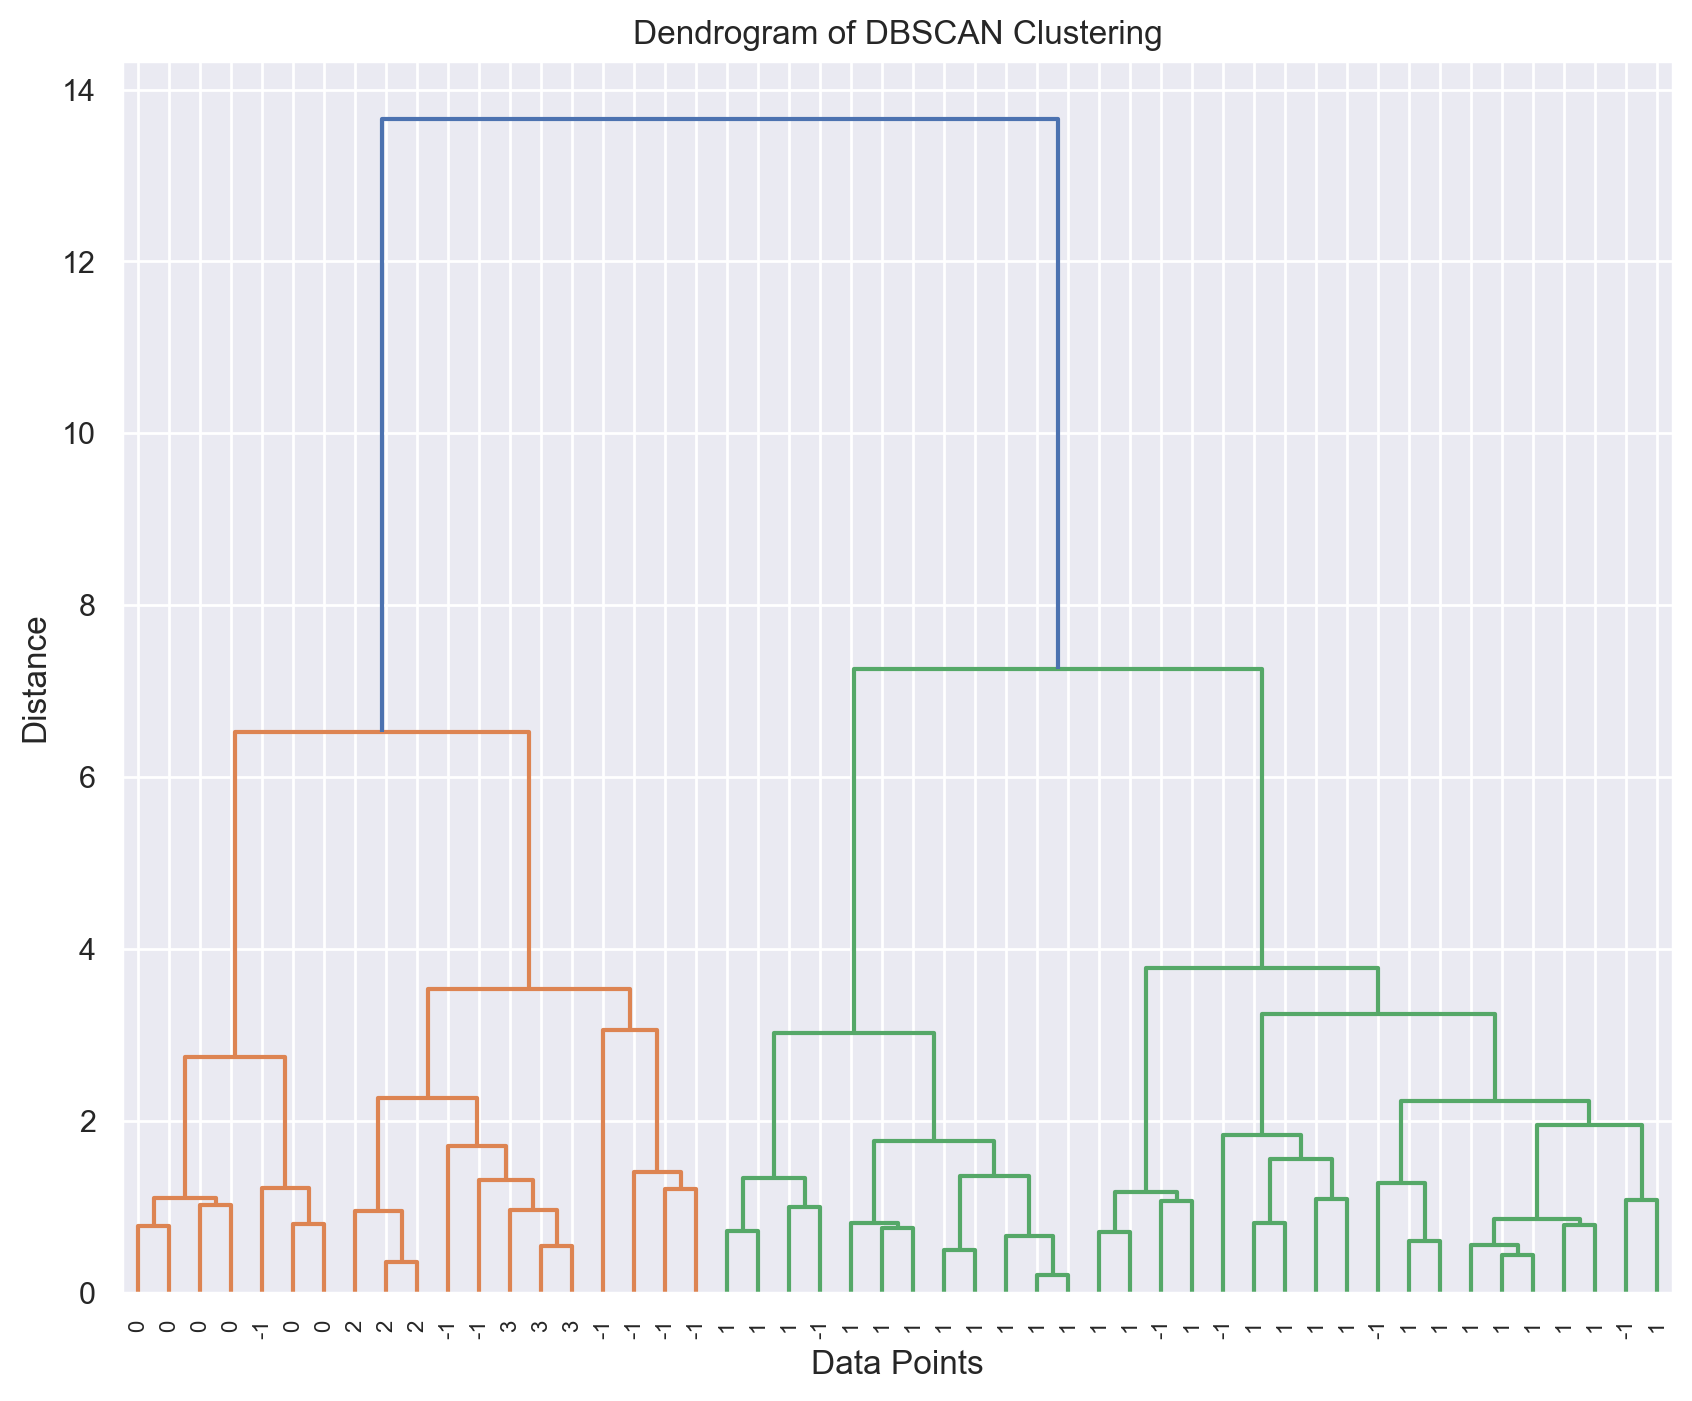

In [62]:
linkage_matrix = hierarchy.linkage(x, 'ward')
hierarchy.dendrogram(linkage_matrix, labels = db_ypred)
plt.title('Dendrogram of DBSCAN Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()